# Model Training: Electronic Transaction Forecast

## Objectives of Notebook

This notebook aims to:

* Perform train/validation split on dataset.
* Perfrom baseline model evaluation.
* Perform Hyperparameter tuning & optimisation.
* Save trained model to pickle file.

## Import Libraries

In [1]:
%autosave 60
%load_ext autoreload
%autoreload 2

Autosaving every 60 seconds


In [2]:
import warnings
import logging
from darts import TimeSeries
from darts.models import NaiveMean, AutoARIMA, Prophet, KalmanForecaster, ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

# Libraries Settings
warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

## Import Customised Functions from Source Code

In [3]:
# Import Functions for Plotting
from src.plot import  plot_train_val, plot_backtest, plot_pred

# Import Functions for Utilities
from src.utils import split_len

# Import Functions for Model Training
from src.train import eval_model,  model_pkl

## Import Preprocessed Data

* Data that have been preprocessed on previous notebook.

In [4]:
# Load previous DataFrame from previous notebook
%store -r debit
%store -r credit
%store -r ue_bank
%store -r ue_nonbank
%store -r qris
%store -r digital_banking

### Convert dataset into TimeSeries format

In [5]:
# Convert Debit DataFrames into TimeSeries for each transaction volume and nominal
debit_vol = TimeSeries.from_dataframe(debit, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
debit_nom = TimeSeries.from_dataframe(debit, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert Credit DataFrames into TimeSeries for each transaction volume and nominal
credit_vol = TimeSeries.from_dataframe(credit, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
credit_nom = TimeSeries.from_dataframe(credit, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert UE Bank DataFrames into TimeSeries for each transaction volume and nominal
ue_bank_vol = TimeSeries.from_dataframe(ue_bank, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
ue_bank_nom = TimeSeries.from_dataframe(ue_bank, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert UE Non-Bank DataFrames into TimeSeries for each transaction volume and nominal
ue_nonbank_vol = TimeSeries.from_dataframe(ue_nonbank, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
ue_nonbank_nom = TimeSeries.from_dataframe(ue_nonbank, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert QRIS DataFrames into TimeSeries for each transaction volume and nominal
qris_vol = TimeSeries.from_dataframe(qris, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
qris_nom = TimeSeries.from_dataframe(qris, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert Digital Banking DataFrames into TimeSeries for each transaction volume and nominal
digital_banking_vol = TimeSeries.from_dataframe(digital_banking, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
digital_banking_nom = TimeSeries.from_dataframe(digital_banking, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

## Train/validation Split

### Split debit_vol & debit_nom into train & validation set (80:20)

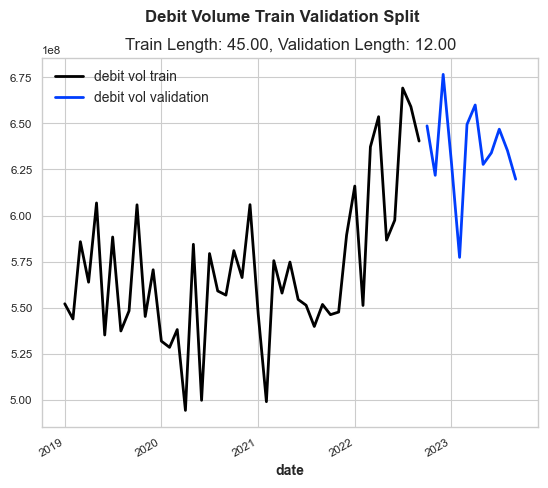

In [6]:
# Get the len for each debit_vol train and validation set using split_len function
train_debit_vol_len = split_len(debit_vol, 0.8)
val_debit_vol_len = split_len(debit_vol, 0.2)

# Split debit_vol into train and validation set with 80:20 ratio
train_debit_vol, val_debit_vol = debit_vol[:train_debit_vol_len], debit_vol[train_debit_vol_len:]

# Plot debit_vol train validation Split
plot_train_val(train=train_debit_vol, 
               train_label='debit vol train',
               val=val_debit_vol,
               val_label='debit vol validation',
               suptitle='Debit Volume Train Validation Split')

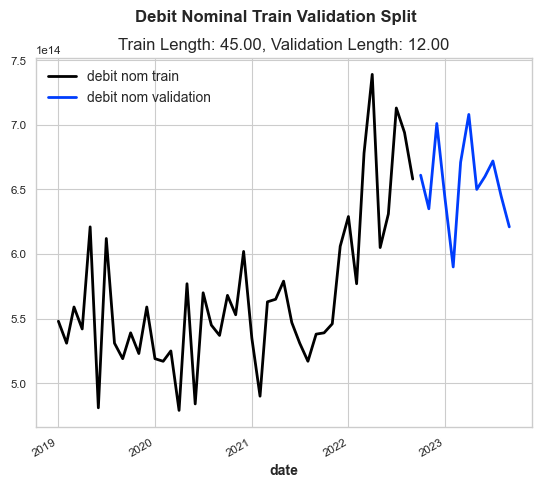

In [7]:
# Get the len for each debit_nom train and validation set using split_len function
train_debit_nom_len = split_len(debit_nom, 0.8)
val_debit_nom_len = split_len(debit_nom, 0.2)

# Split debit_nom into train and validation set with 80:20 ratio
train_debit_nom, val_debit_nom = debit_nom[:train_debit_nom_len], debit_nom[train_debit_nom_len:]

# Plot debit_nom train validation Split
plot_train_val(train=train_debit_nom, 
               train_label='debit nom train',
               val=val_debit_nom,
               val_label='debit nom validation',
               suptitle='Debit Nominal Train Validation Split')


### Split credit_vol & credit_nom into train & validation set (80:20)

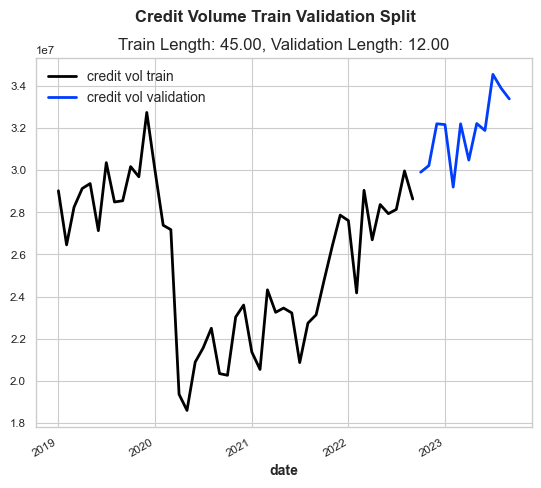

In [8]:
# Get the len for each credit_vol train and validation set using split_len function
train_credit_vol_len = split_len(credit_vol, 0.8)
val_credit_vol_len = split_len(credit_vol, 0.2)

# Split credit_vol into train and validation set with 80:20 ratio
train_credit_vol, val_credit_vol = credit_vol[:train_credit_vol_len], credit_vol[train_credit_vol_len:]

# Plot credit_vol train validation Split
plot_train_val(train=train_credit_vol, 
               train_label='credit vol train',
               val=val_credit_vol,
               val_label='credit vol validation',
               suptitle='Credit Volume Train Validation Split')

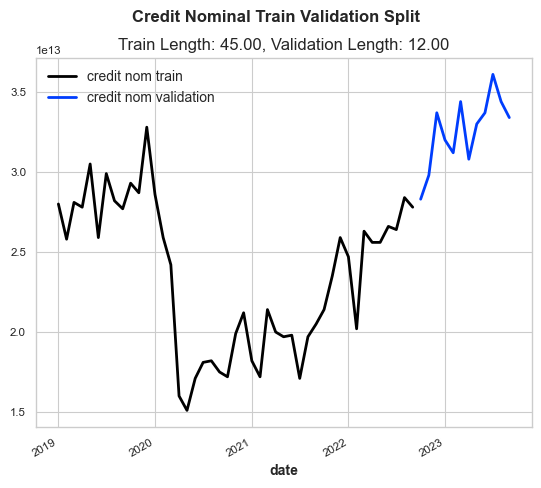

In [9]:
# Get the len for each credit_nom train and validation set using split_len function
train_credit_nom_len = split_len(credit_nom, 0.8)
val_credit_nom_len = split_len(credit_nom, 0.2)

# Split credit_nom into train and validation set with 80:20 ratio
train_credit_nom, val_credit_nom = credit_nom[:train_credit_nom_len], credit_nom[train_credit_nom_len:]

# Plot credit_nom train validation Split
plot_train_val(train=train_credit_nom, 
               train_label='credit nom train',
               val=val_credit_nom,
               val_label='credit nom validation',
               suptitle='Credit Nominal Train Validation Split')

### Split ue_bank_vol & ue_bank_nom into train & validation set (80:20)

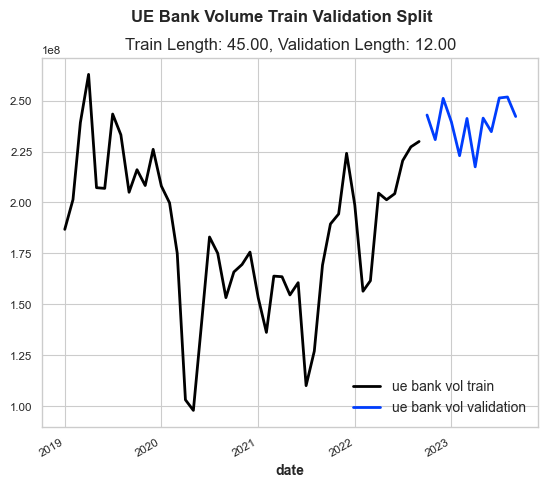

In [10]:
# Get the len for each ue_bank_vol train and validation set using split_len function
train_ue_bank_vol_len = split_len(ue_bank_vol, 0.8)
val_ue_bank_vol_len = split_len(ue_bank_vol, 0.2)

# Split ue_bank_vol into train and validation set with 80:20 ratio
train_ue_bank_vol, val_ue_bank_vol = ue_bank_vol[:train_ue_bank_vol_len], ue_bank_vol[train_ue_bank_vol_len:]

# Plot ue_bank_vol train validation Split
plot_train_val(train=train_ue_bank_vol, 
               train_label='ue bank vol train',
               val=val_ue_bank_vol,
               val_label='ue bank vol validation',
               suptitle='UE Bank Volume Train Validation Split')

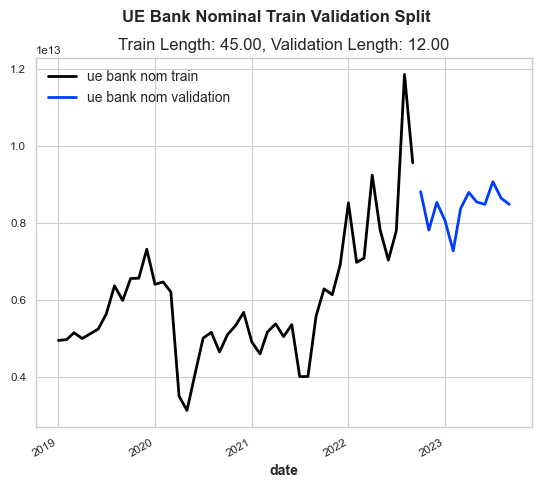

In [11]:
# Get the len for each ue_bank_nom train and validation set using split_len function
train_ue_bank_nom_len = split_len(ue_bank_nom, 0.8)
val_ue_bank_nom_len = split_len(ue_bank_nom, 0.2)

# Split ue_bank_nom into train and validation set with 80:20 ratio
train_ue_bank_nom, val_ue_bank_nom = ue_bank_nom[:train_ue_bank_nom_len], ue_bank_nom[train_ue_bank_nom_len:]

# Plot ue_bank_nom train validation Split
plot_train_val(train=train_ue_bank_nom, 
               train_label='ue bank nom train',
               val=val_ue_bank_nom,
               val_label='ue bank nom validation',
               suptitle='UE Bank Nominal Train Validation Split')


### Split ue_nonbank_vol & ue_nonbank_nom into train & validation set (80:20)

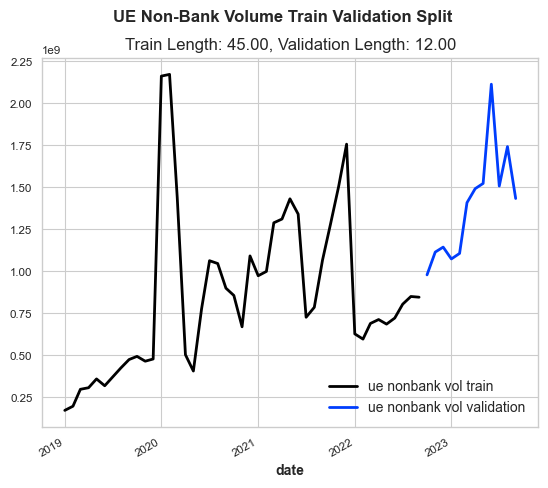

In [12]:
# Get the len for each ue_nonbank_vol train and validation set using split_len function
train_ue_nonbank_vol_len = split_len(ue_nonbank_vol, 0.8)
val_ue_nonbank_vol_len = split_len(ue_nonbank_vol, 0.2)

# Split ue_nonbank_vol into train and validation set with 80:20 ratio
train_ue_nonbank_vol, val_ue_nonbank_vol = ue_nonbank_vol[:train_ue_nonbank_vol_len], ue_nonbank_vol[train_ue_nonbank_vol_len:]

# Plot ue_nonbank_vol train validation Split
plot_train_val(train=train_ue_nonbank_vol, 
               train_label='ue nonbank vol train',
               val=val_ue_nonbank_vol,
               val_label='ue nonbank vol validation',
               suptitle='UE Non-Bank Volume Train Validation Split')

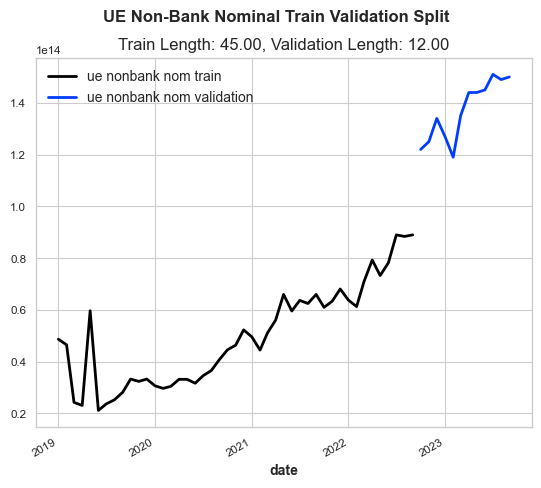

In [13]:
# Get the len for each ue_nonbank_nom train and validation set using split_len function
train_ue_nonbank_nom_len = split_len(ue_nonbank_nom, 0.8)
val_ue_nonbank_nom_len = split_len(ue_nonbank_nom, 0.2)

# Split ue_nonbank_nom into train and validation set with 80:20 ratio
train_ue_nonbank_nom, val_ue_nonbank_nom = ue_nonbank_nom[:train_ue_nonbank_nom_len], ue_nonbank_nom[train_ue_nonbank_nom_len:]

# Plot ue_nonbank_nom train validation Split
plot_train_val(train=train_ue_nonbank_nom, 
               train_label='ue nonbank nom train',
               val=val_ue_nonbank_nom,
               val_label='ue nonbank nom validation',
               suptitle='UE Non-Bank Nominal Train Validation Split')

### Split qris_vol & qris_nom into train & validation set (80:20)

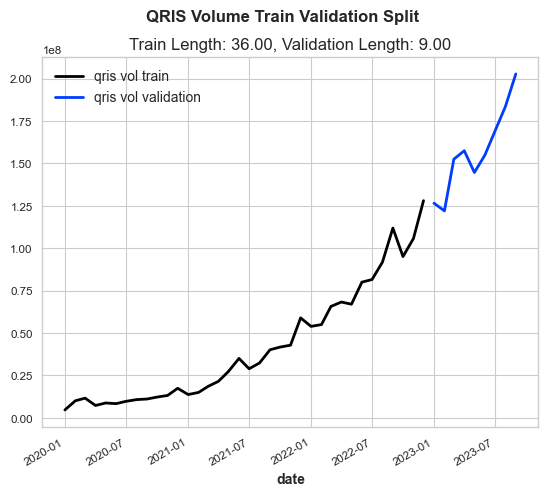

In [14]:
# Get the len for each qris_vol train and validation set using split_len function
train_qris_vol_len = split_len(qris_vol, 0.8)
val_qris_vol_len = split_len(qris_vol, 0.2)

# Split qris_vol into train and validation set with 80:20 ratio
train_qris_vol, val_qris_vol = qris_vol[:train_qris_vol_len], qris_vol[train_qris_vol_len:]

# Plot qris_vol train validation Split
plot_train_val(train=train_qris_vol, 
               train_label='qris vol train',
               val=val_qris_vol,
               val_label='qris vol validation',
               suptitle='QRIS Volume Train Validation Split')

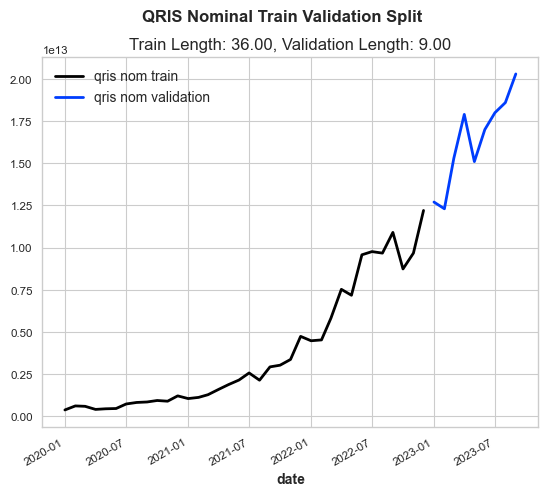

In [15]:
# Get the len for each qris_nom train and validation set using split_len function
train_qris_nom_len = split_len(qris_nom, 0.8)
val_qris_nom_len = split_len(qris_nom, 0.2)

# Split qris_nom into train and validation set with 80:20 ratio
train_qris_nom, val_qris_nom = qris_nom[:train_qris_nom_len], qris_nom[train_qris_nom_len:]

# Plot qris_nom train validation Split
plot_train_val(train=train_qris_nom, 
               train_label='qris nom train',
               val=val_qris_nom,
               val_label='qris nom validation',
               suptitle='QRIS Nominal Train Validation Split')

### Split digital_banking_vol & digital_banking_nom into train & validation set (80:20)

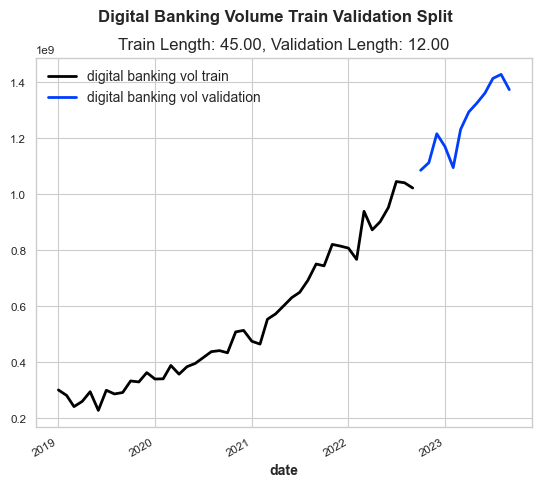

In [16]:
# Get the len for each digital_banking_vol train and validation set using split_len function
train_digital_banking_vol_len = split_len(digital_banking_vol, 0.8)
val_digital_banking_vol_len = split_len(digital_banking_vol, 0.2)

# Split digital_banking_vol into train and validation set with 80:20 ratio
train_digital_banking_vol, val_digital_banking_vol = digital_banking_vol[:train_digital_banking_vol_len], digital_banking_vol[train_digital_banking_vol_len:]

# Plot digital_banking_vol train validation Split
plot_train_val(train=train_digital_banking_vol, 
               train_label='digital banking vol train',
               val=val_digital_banking_vol,
               val_label='digital banking vol validation',
               suptitle='Digital Banking Volume Train Validation Split')

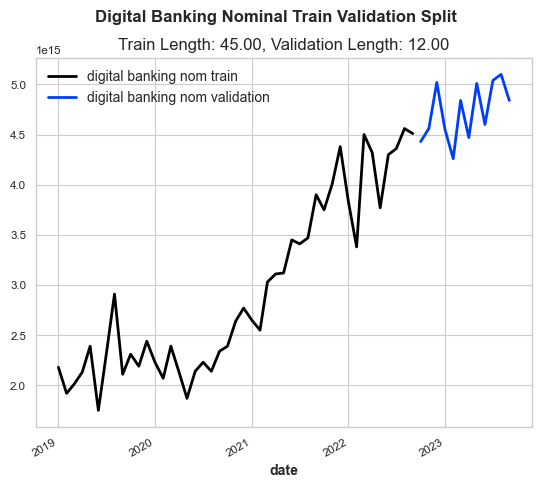

In [17]:
# Get the len for each digital_banking_nom train and validation set using split_len function
train_digital_banking_nom_len = split_len(digital_banking_nom, 0.8)
val_digital_banking_nom_len = split_len(digital_banking_nom, 0.2)

# Split digital_banking_nom into train and validation set with 80:20 ratio
train_digital_banking_nom, val_digital_banking_nom = digital_banking_nom[:train_digital_banking_nom_len], digital_banking_nom[train_digital_banking_nom_len:]

# Plot digital_banking_nom train validation Split
plot_train_val(train=train_digital_banking_nom, 
               train_label='digital banking nom train',
               val=val_digital_banking_nom,
               val_label='digital banking nom validation',
               suptitle='Digital Banking Nominal Train Validation Split')

## Baseline Model Evaluation

* Evaluate each model performance (NaiveMean, AutoARIMA, Prophet, KalmanForecaster, ExponentialSmoothing) using default parameters on each dataset.

#### | debit_vol Baseline Model Evaluation 

In [18]:
# Use eval_model function to evaluate the performance of each model on debit_vol
eval_model(model=Prophet(), len=val_debit_vol_len, train=train_debit_vol, val=val_debit_vol)
eval_model(model=AutoARIMA(), len=val_debit_vol_len, train=train_debit_vol, val=val_debit_vol)
eval_model(model=ExponentialSmoothing(), len=val_debit_vol_len, train=train_debit_vol, val=val_debit_vol)
eval_model(model=KalmanForecaster(), len=val_debit_vol_len, train=train_debit_vol, val=val_debit_vol)
eval_model(model=NaiveMean(), len=val_debit_vol_len, train=train_debit_vol, val=val_debit_vol)

Prophet() - MAPE: 6.88%, RMSE: 0.05M, MAE: 0.05M, Score: 3.3
AutoARIMA() - MAPE: 2.79%, RMSE: 0.02M, MAE: 0.02M, Score: 12.8
ExponentialSmoothing() - MAPE: 6.57%, RMSE: 0.05M, MAE: 0.05M, Score: 3.2
KalmanForecaster() - MAPE: 2.85%, RMSE: 0.03M, MAE: 0.02M, Score: 13.1
NaiveMean() - MAPE: 11.73%, RMSE: 0.07M, MAE: 0.07M, Score: 4.6


#### | debit_nom initial statistical model evaluation 

In [19]:
# Use eval_model function to evaluate the performance of each model on debit_nom
eval_model(model=Prophet(), len=val_debit_nom_len, train=train_debit_nom, val=val_debit_nom)
eval_model(model=AutoARIMA(), len=val_debit_nom_len, train=train_debit_nom, val=val_debit_nom)
eval_model(model=ExponentialSmoothing(), len=val_debit_nom_len, train=train_debit_nom, val=val_debit_nom)
eval_model(model=KalmanForecaster(), len=val_debit_nom_len, train=train_debit_nom, val=val_debit_nom)
eval_model(model=NaiveMean(), len=val_debit_nom_len, train=train_debit_nom, val=val_debit_nom)

Prophet() - MAPE: 9.30%, RMSE: 79022.89M, MAE: 68873.03M, Score: 4.8
AutoARIMA() - MAPE: 3.57%, RMSE: 31273.80M, MAE: 23739.86M, Score: 16.6
ExponentialSmoothing() - MAPE: 8.58%, RMSE: 71461.82M, MAE: 62577.23M, Score: 4.4
KalmanForecaster() - MAPE: 5.57%, RMSE: 45142.42M, MAE: 38527.47M, Score: 2.7
NaiveMean() - MAPE: 15.99%, RMSE: 95726.31M, MAE: 90684.85M, Score: 6.2


#### | credit_vol initial statistical model evaluation

In [20]:
# Use eval_model function to evaluate the performance of each model on credit_vol
eval_model(model=NaiveMean(), len=val_credit_vol_len, train=train_credit_vol, val=val_credit_vol)
eval_model(model=AutoARIMA(), len=val_credit_vol_len, train=train_credit_vol, val=val_credit_vol)
eval_model(model=KalmanForecaster(), len=val_credit_vol_len, train=train_credit_vol, val=val_credit_vol)
eval_model(model=ExponentialSmoothing(), len=val_credit_vol_len, train=train_credit_vol, val=val_credit_vol)
eval_model(model=Prophet(), len=val_credit_vol_len, train=train_credit_vol, val=val_credit_vol)

NaiveMean() - MAPE: 23.39%, RMSE: 0.01M, MAE: 0.01M, Score: 4.6
AutoARIMA() - MAPE: 17.55%, RMSE: 0.01M, MAE: 0.00M, Score: 3.6
KalmanForecaster() - MAPE: 15.91%, RMSE: 0.00M, MAE: 0.00M, Score: 3.4
ExponentialSmoothing() - MAPE: 8.08%, RMSE: 0.00M, MAE: 0.00M, Score: 16.2
Prophet() - MAPE: 3.98%, RMSE: 0.00M, MAE: 0.00M, Score: 8.6


#### | credit_nom initial statistical model evaluation

In [21]:
# Use eval_model function to evaluate the performance of each model on credit_nom
eval_model(model=NaiveMean(), len=val_credit_nom_len, train=train_credit_nom, val=val_credit_nom)
eval_model(model=AutoARIMA(), len=val_credit_nom_len, train=train_credit_nom, val=val_credit_nom)
eval_model(model=KalmanForecaster(), len=val_credit_nom_len, train=train_credit_nom, val=val_credit_nom)
eval_model(model=ExponentialSmoothing(), len=val_credit_nom_len, train=train_credit_nom, val=val_credit_nom)
eval_model(model=Prophet(), len=val_credit_nom_len, train=train_credit_nom, val=val_credit_nom)

NaiveMean() - MAPE: 38.23%, RMSE: 9251.00M, MAE: 8986.46M, Score: 7.0
AutoARIMA() - MAPE: 26.37%, RMSE: 7285.99M, MAE: 6720.43M, Score: 5.3
KalmanForecaster() - MAPE: 22.39%, RMSE: 6486.78M, MAE: 5896.44M, Score: 4.6
ExponentialSmoothing() - MAPE: 8.08%, RMSE: 2921.47M, MAE: 2413.09M, Score: 16.3
Prophet() - MAPE: 54.53%, RMSE: 11665.91M, MAE: 11340.59M, Score: 9.1


#### | ue_bank_vol initial statistical model evaluation

In [22]:
# Use eval_model function to evaluate the performance of each model on ue_bank_vol
eval_model(model=NaiveMean(), len=val_ue_bank_vol_len, train=train_ue_bank_vol, val=val_ue_bank_vol)
eval_model(model=AutoARIMA(), len=val_ue_bank_vol_len, train=train_ue_bank_vol, val=val_ue_bank_vol)
eval_model(model=KalmanForecaster(), len=val_ue_bank_vol_len, train=train_ue_bank_vol, val=val_ue_bank_vol)
eval_model(model=ExponentialSmoothing(), len=val_ue_bank_vol_len, train=train_ue_bank_vol, val=val_ue_bank_vol)
eval_model(model=Prophet(), len=val_ue_bank_vol_len, train=train_ue_bank_vol, val=val_ue_bank_vol)

NaiveMean() - MAPE: 28.83%, RMSE: 0.05M, MAE: 0.05M, Score: 4.4
AutoARIMA() - MAPE: 23.00%, RMSE: 0.05M, MAE: 0.04M, Score: 3.6
KalmanForecaster() - MAPE: 11.18%, RMSE: 0.03M, MAE: 0.02M, Score: 15.7
ExponentialSmoothing() - MAPE: 4.86%, RMSE: 0.01M, MAE: 0.01M, Score: 8.0
Prophet() - MAPE: 42.72%, RMSE: 0.07M, MAE: 0.07M, Score: 6.0


#### | ue_bank_nom initial statistical model evaluation

In [23]:
# Use eval_model function to evaluate the performance of each model on ue_bank_nom
eval_model(model=NaiveMean(), len=val_ue_bank_nom_len, train=train_ue_bank_nom, val=val_ue_bank_nom)
eval_model(model=AutoARIMA(), len=val_ue_bank_nom_len, train=train_ue_bank_nom, val=val_ue_bank_nom)
eval_model(model=KalmanForecaster(), len=val_ue_bank_nom_len, train=train_ue_bank_nom, val=val_ue_bank_nom)
eval_model(model=ExponentialSmoothing(), len=val_ue_bank_nom_len, train=train_ue_bank_nom, val=val_ue_bank_nom)
eval_model(model=Prophet(), len=val_ue_bank_nom_len, train=train_ue_bank_nom, val=val_ue_bank_nom)

NaiveMean() - MAPE: 40.69%, RMSE: 2477.21M, MAE: 2428.83M, Score: 16.3
AutoARIMA() - MAPE: 12.16%, RMSE: 1260.67M, MAE: 1162.73M, Score: 7.8
KalmanForecaster() - MAPE: 24.18%, RMSE: 2793.31M, MAE: 2707.98M, Score: 17.5
ExponentialSmoothing() - MAPE: 30.33%, RMSE: 3825.08M, MAE: 3711.41M, Score: 3.5
Prophet() - MAPE: 9.64%, RMSE: 1207.29M, MAE: 935.09M, Score: 6.8


#### | ue_nonbank_vol initial statistical model evaluation

In [24]:
# Use eval_model function to evaluate the performance of each model on ue_nonbank_vol
eval_model(model=NaiveMean(), len=val_ue_nonbank_vol_len, train=train_ue_nonbank_vol, val=val_ue_nonbank_vol)
eval_model(model=AutoARIMA(), len=val_ue_nonbank_vol_len, train=train_ue_nonbank_vol, val=val_ue_nonbank_vol)
eval_model(model=KalmanForecaster(), len=val_ue_nonbank_vol_len, train=train_ue_nonbank_vol, val=val_ue_nonbank_vol)
eval_model(model=ExponentialSmoothing(), len=val_ue_nonbank_vol_len, train=train_ue_nonbank_vol, val=val_ue_nonbank_vol)
eval_model(model=Prophet(), len=val_ue_nonbank_vol_len, train=train_ue_nonbank_vol, val=val_ue_nonbank_vol)

NaiveMean() - MAPE: 61.71%, RMSE: 0.62M, MAE: 0.53M, Score: 5.9
AutoARIMA() - MAPE: 60.02%, RMSE: 0.61M, MAE: 0.52M, Score: 5.8
KalmanForecaster() - MAPE: 74.19%, RMSE: 0.68M, MAE: 0.59M, Score: 6.8
ExponentialSmoothing() - MAPE: 26.43%, RMSE: 0.42M, MAE: 0.35M, Score: 3.4
Prophet() - MAPE: 32.73%, RMSE: 0.45M, MAE: 0.39M, Score: 3.8


#### | ue_nonbank_nom initial statistical model evaluation

In [25]:
# Use eval_model function to evaluate the performance of each model on ue_nonbank_nom
eval_model(model=NaiveMean(), len=val_ue_nonbank_nom_len, train=train_ue_nonbank_nom, val=val_ue_nonbank_nom)
eval_model(model=AutoARIMA(), len=val_ue_nonbank_nom_len, train=train_ue_nonbank_nom, val=val_ue_nonbank_nom)
eval_model(model=KalmanForecaster(), len=val_ue_nonbank_nom_len, train=train_ue_nonbank_nom, val=val_ue_nonbank_nom)
eval_model(model=ExponentialSmoothing(), len=val_ue_nonbank_nom_len, train=train_ue_nonbank_nom, val=val_ue_nonbank_nom)
eval_model(model=Prophet(), len=val_ue_nonbank_nom_len, train=train_ue_nonbank_nom, val=val_ue_nonbank_nom)

NaiveMean() - MAPE: 171.94%, RMSE: 86613.56M, MAE: 85931.31M, Score: 12.1
AutoARIMA() - MAPE: 42.32%, RMSE: 41367.17M, MAE: 40527.49M, Score: 4.1
KalmanForecaster() - MAPE: 25.64%, RMSE: 27948.06M, MAE: 27453.04M, Score: 17.6
ExponentialSmoothing() - MAPE: 31.95%, RMSE: 33566.60M, MAE: 33016.97M, Score: 3.3
Prophet() - MAPE: 47.29%, RMSE: 44297.35M, MAE: 43310.08M, Score: 4.5


#### | qris_vol initial statistical model evaluation

In [26]:
# Use eval_model function to evaluate the performance of each model on qris_vol
eval_model(model=NaiveMean(), len=val_qris_vol_len, train=train_qris_vol, val=val_qris_vol)
eval_model(model=AutoARIMA(), len=val_qris_vol_len, train=train_qris_vol, val=val_qris_vol)
eval_model(model=KalmanForecaster(), len=val_qris_vol_len, train=train_qris_vol, val=val_qris_vol)
eval_model(model=ExponentialSmoothing(), len=val_qris_vol_len, train=train_qris_vol, val=val_qris_vol)
eval_model(model=Prophet(), len=val_qris_vol_len, train=train_qris_vol, val=val_qris_vol)

NaiveMean() - MAPE: 276.18%, RMSE: 0.12M, MAE: 0.12M, Score: 18.0
AutoARIMA() - MAPE: 7.74%, RMSE: 0.01M, MAE: 0.01M, Score: 8.3
KalmanForecaster() - MAPE: 11.42%, RMSE: 0.03M, MAE: 0.02M, Score: 14.5
ExponentialSmoothing() - MAPE: 6.61%, RMSE: 0.01M, MAE: 0.01M, Score: 6.9
Prophet() - MAPE: 8.86%, RMSE: 0.01M, MAE: 0.01M, Score: 8.7


#### | qris_nom initial statistical model evaluation

In [27]:
# Use eval_model function to evaluate the performance of each model on qris_nom
eval_model(model=NaiveMean(), len=val_qris_nom_len, train=train_qris_nom, val=val_qris_nom)
eval_model(model=AutoARIMA(), len=val_qris_nom_len, train=train_qris_nom, val=val_qris_nom)
eval_model(model=KalmanForecaster(), len=val_qris_nom_len, train=train_qris_nom, val=val_qris_nom)
eval_model(model=ExponentialSmoothing(), len=val_qris_nom_len, train=train_qris_nom, val=val_qris_nom)
eval_model(model=Prophet(), len=val_qris_nom_len, train=train_qris_nom, val=val_qris_nom)

NaiveMean() - MAPE: 333.17%, RMSE: 12836.00M, MAE: 12579.81M, Score: 21.0
AutoARIMA() - MAPE: 26.35%, RMSE: 3830.85M, MAE: 3344.30M, Score: 3.2
KalmanForecaster() - MAPE: 24.11%, RMSE: 7003.34M, MAE: 5901.50M, Score: 4.8
ExponentialSmoothing() - MAPE: 16.42%, RMSE: 2664.99M, MAE: 2356.75M, Score: 15.7
Prophet() - MAPE: 11.75%, RMSE: 2052.22M, MAE: 1691.82M, Score: 11.7


#### | digital_banking_vol initial statistical model evaluation

In [28]:
# Use eval_model function to evaluate the performance of each model on digital_banking_vol
eval_model(model=NaiveMean(), len=val_digital_banking_vol_len, train=train_digital_banking_vol, val=val_digital_banking_vol)
eval_model(model=AutoARIMA(), len=val_digital_banking_vol_len, train=train_digital_banking_vol, val=val_digital_banking_vol)
eval_model(model=KalmanForecaster(), len=val_digital_banking_vol_len, train=train_digital_banking_vol, val=val_digital_banking_vol)
eval_model(model=ExponentialSmoothing(), len=val_digital_banking_vol_len, train=train_digital_banking_vol, val=val_digital_banking_vol)
eval_model(model=Prophet(), len=val_digital_banking_vol_len, train=train_digital_banking_vol, val=val_digital_banking_vol)

NaiveMean() - MAPE: 128.45%, RMSE: 0.71M, MAE: 0.70M, Score: 9.4
AutoARIMA() - MAPE: 5.57%, RMSE: 0.08M, MAE: 0.07M, Score: 4.6
KalmanForecaster() - MAPE: 6.03%, RMSE: 0.09M, MAE: 0.08M, Score: 5.5
ExponentialSmoothing() - MAPE: 3.69%, RMSE: 0.05M, MAE: 0.05M, Score: 3.1
Prophet() - MAPE: 4.34%, RMSE: 0.06M, MAE: 0.05M, Score: 3.6


#### | digital_banking_nom initial statistical model evaluation

In [29]:
# Use eval_model function to evaluate the performance of each model on digital_banking_nom
eval_model(model=NaiveMean(), len=val_digital_banking_nom_len, train=train_digital_banking_nom, val=val_digital_banking_nom)
eval_model(model=AutoARIMA(), len=val_digital_banking_nom_len, train=train_digital_banking_nom, val=val_digital_banking_nom)
eval_model(model=KalmanForecaster(), len=val_digital_banking_nom_len, train=train_digital_banking_nom, val=val_digital_banking_nom)
eval_model(model=ExponentialSmoothing(), len=val_digital_banking_nom_len, train=train_digital_banking_nom, val=val_digital_banking_nom)
eval_model(model=Prophet(), len=val_digital_banking_nom_len, train=train_digital_banking_nom, val=val_digital_banking_nom)

NaiveMean() - MAPE: 60.36%, RMSE: 1797194.57M, MAE: 1775252.53M, Score: 13.1
AutoARIMA() - MAPE: 5.95%, RMSE: 351687.39M, MAE: 296292.87M, Score: 10.2
KalmanForecaster() - MAPE: 8.42%, RMSE: 494624.91M, MAE: 437797.79M, Score: 3.1
ExponentialSmoothing() - MAPE: 4.03%, RMSE: 232623.14M, MAE: 195197.10M, Score: 13.0
Prophet() - MAPE: 8.89%, RMSE: 523345.22M, MAE: 468236.58M, Score: 3.3


## Hyperparameter Tuning, Optimization, & Backtesting

### Prophet

#### Debit Vol Prophet

In [30]:
# Initialize Prophet model for training on debit_vol
prophet_debit_vol = Prophet(
                        add_seasonalities={        # Add monthly seasonality
                        'name':"monthly",          # Name of the seasonality component
                        'seasonal_periods':30,     # No. of days in one period
                        'fourier_order':1,         # No. of Fourier components to use
                        }, country_holidays='ID')  # Add Indonesian holidays

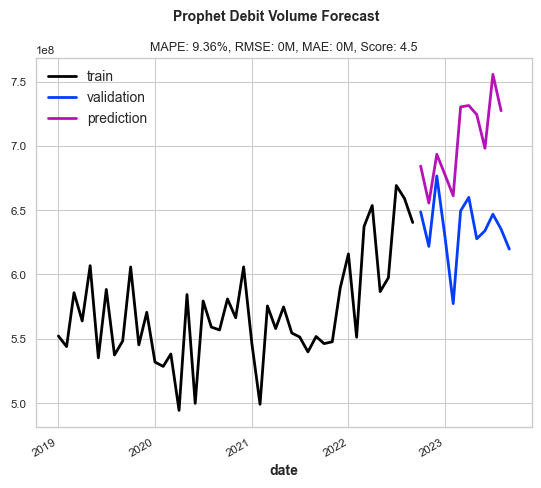

In [31]:
# Fit Prophet model on train_debit_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_debit_vol, 
            len=val_debit_vol_len, 
            train=train_debit_vol,
            val=val_debit_vol,
            suptitle='Prophet Debit Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

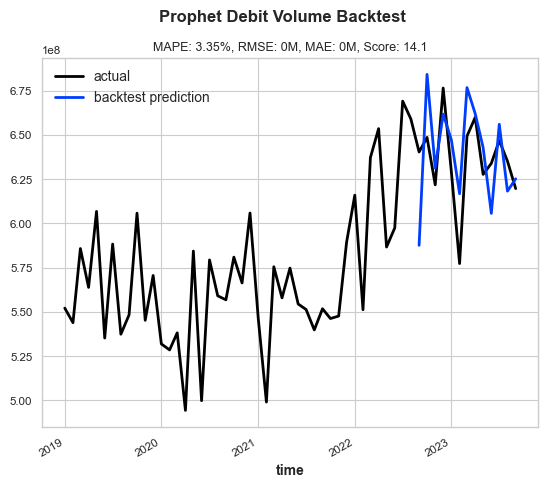

In [32]:
# Backtest Prophet model on debit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_debit_vol, 
              train=debit_vol,
              suptitle='Prophet Debit Volume Backtest',
              start_val=0.8)

In [33]:
# Save debit_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_debit_vol, pickle_name='debit_vol_prophet')


debit_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Debit Nom Prophet

In [34]:
# Initialize Prophet model for training on debit_nom
prophet_debit_nom = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Name of the seasonality component
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

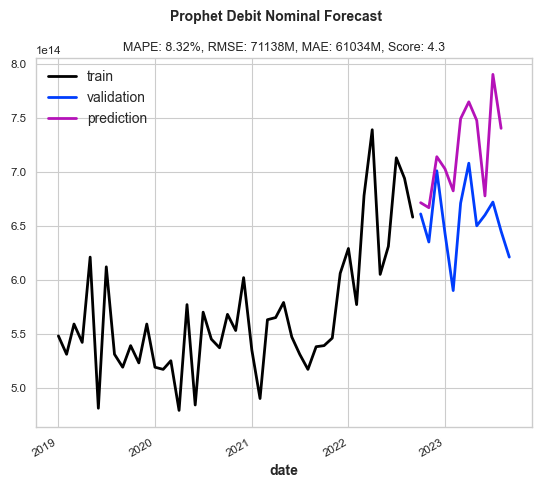

In [35]:
# Fit Prophet model on train_debit_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_debit_nom, 
            len=val_debit_nom_len, 
            train=train_debit_nom,
            val=val_debit_nom,
            suptitle='Prophet Debit Nominal Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

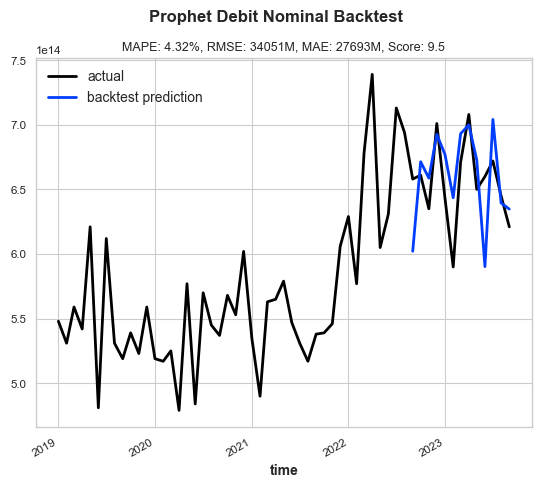

In [36]:
# Backtest Prophet model on debit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_debit_nom, 
              train=debit_nom,
              suptitle='Prophet Debit Nominal Backtest',
              start_val=0.8)

In [37]:
# Save debit_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_debit_nom, pickle_name='debit_nom_prophet')

debit_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Vol Prophet

In [38]:
# Initialize Prophet model for training on credit_vol
prophet_credit_vol = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

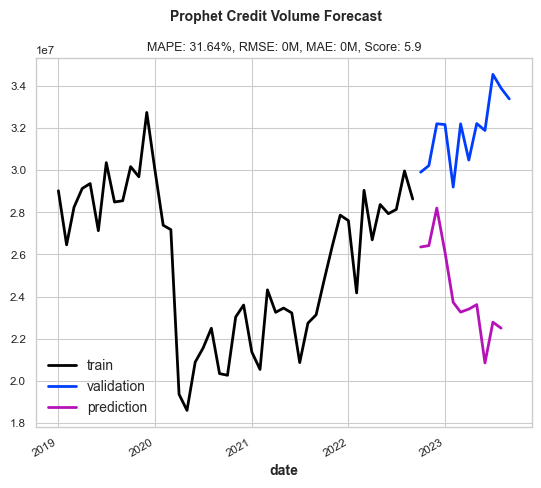

In [39]:
# Fit Prophet model on train_credit_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_credit_vol, 
            len=val_credit_vol_len, 
            train=train_credit_vol,
            val=val_credit_vol,
            suptitle='Prophet Credit Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

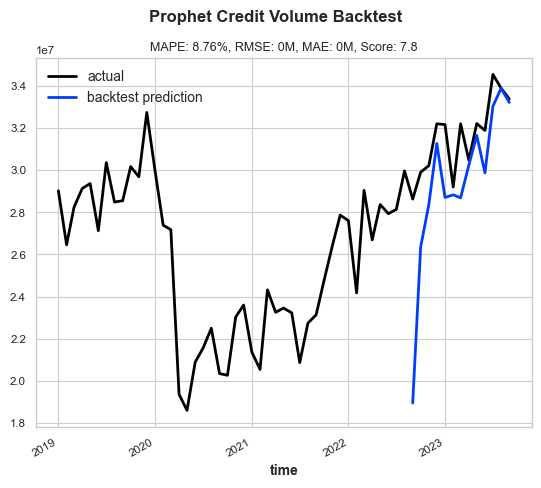

In [40]:
# Backtest Prophet model on credit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_credit_vol, 
              train=credit_vol,
              suptitle='Prophet Credit Volume Backtest',
              start_val=0.8)

In [41]:
# Save credit_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_credit_vol, pickle_name='credit_vol_prophet')

credit_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Nom Prophet

In [42]:
# Initialize Prophet model for training on credit_nom
prophet_credit_nom = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality    
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

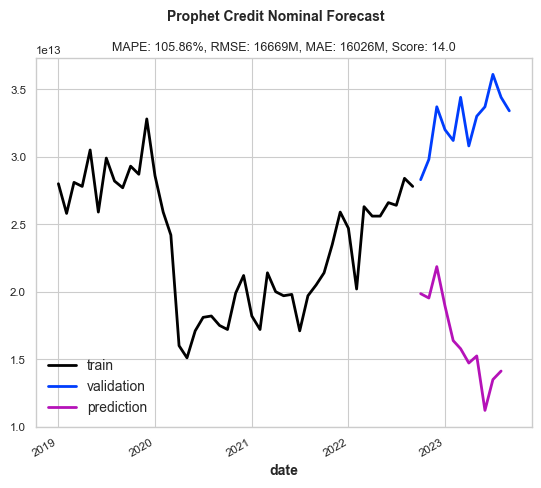

In [43]:
# Fit Prophet model on train_credit_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_credit_nom, 
            len=val_credit_nom_len, 
            train=train_credit_nom,
            val=val_credit_nom,
            suptitle='Prophet Credit Nominal Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

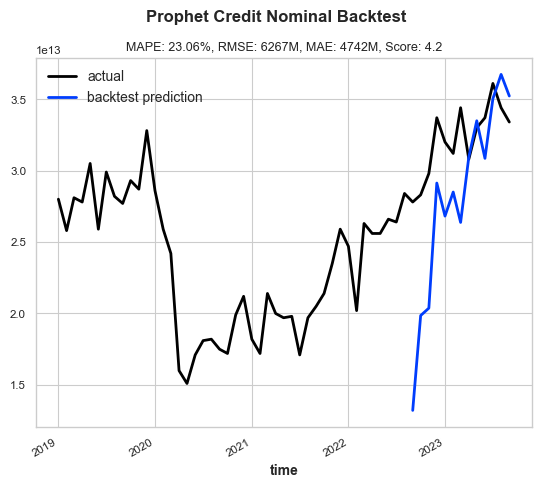

In [44]:
# Backtest Prophet model on credit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_credit_nom, 
              train=credit_nom,
              suptitle='Prophet Credit Nominal Backtest',
              start_val=0.8)

In [45]:
# Save credit_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_credit_nom, pickle_name='credit_nom_prophet')

credit_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Vol Prophet

In [46]:
# Initialize Prophet model for training on ue_bank_vol
prophet_ue_bank_vol = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality    
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          #  No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

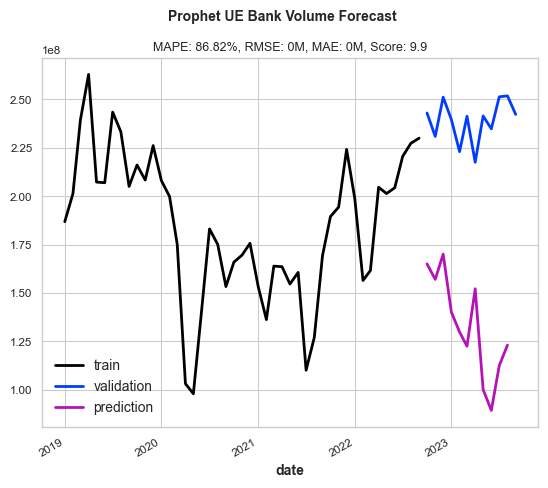

In [47]:
# Fit Prophet model on train_ue_bank_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_ue_bank_vol, 
            len=val_ue_bank_vol_len, 
            train=train_ue_bank_vol,
            val=val_ue_bank_vol,
            suptitle='Prophet UE Bank Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

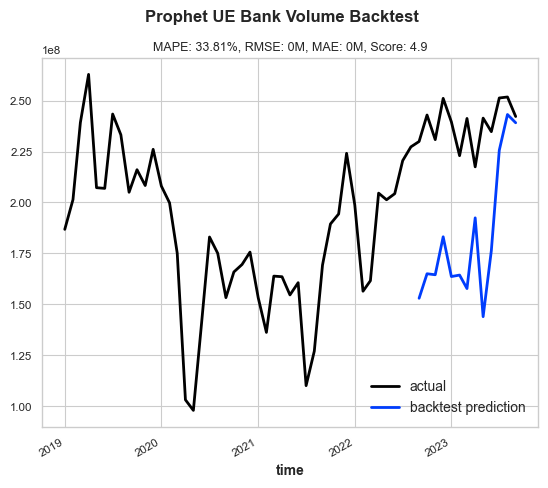

In [48]:
# Backtest Prophet model on ue_bank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_ue_bank_vol, 
              train=ue_bank_vol,
              suptitle='Prophet UE Bank Volume Backtest',
              start_val=0.8)

In [49]:
# Save ue_bank_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_ue_bank_vol, pickle_name='ue_bank_vol_prophet')

ue_bank_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Nom Prophet

In [50]:
# Initialize Prophet model for training on ue_bank_nom
prophet_ue_bank_nom = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

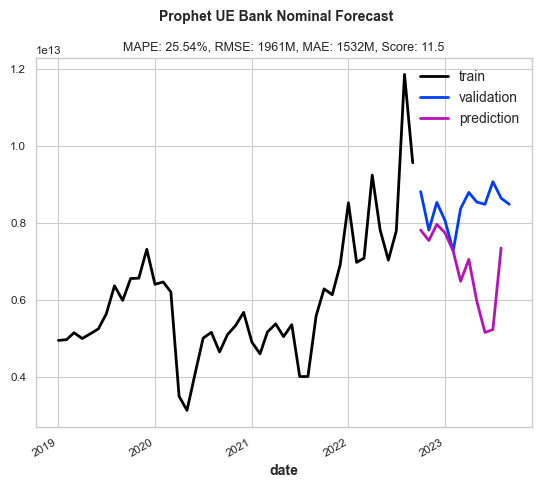

In [51]:
# Fit Prophet model on train_ue_bank_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_ue_bank_nom, 
            len=val_ue_bank_nom_len, 
            train=train_ue_bank_nom,
            val=val_ue_bank_nom,
            suptitle='Prophet UE Bank Nominal Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

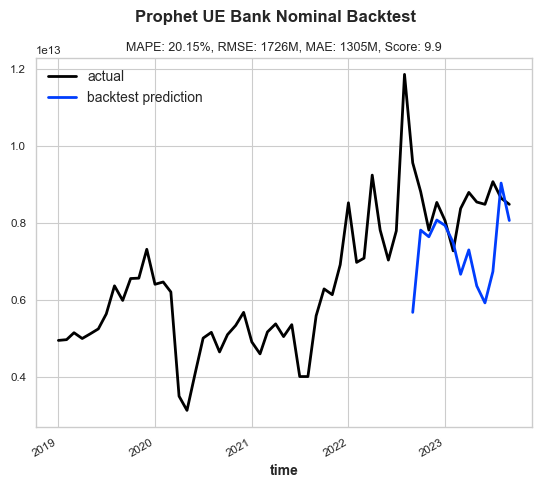

In [52]:
# Backtest Prophet model on ue_bank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_ue_bank_nom, 
              train=ue_bank_nom,
              suptitle='Prophet UE Bank Nominal Backtest',
              start_val=0.8)

In [53]:
# Save ue_bank_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_ue_bank_nom, pickle_name='ue_bank_nom_prophet')

ue_bank_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Vol Prophet

In [54]:
# Initialize Prophet model for training on ue_nonbank_vol
prophet_ue_nonbank_vol = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

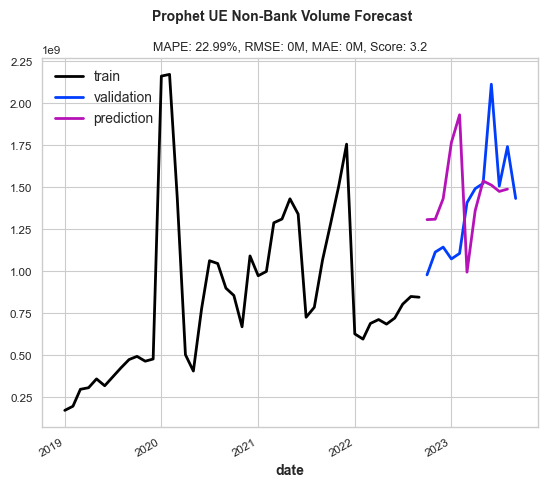

In [55]:
# Fit Prophet model on train_ue_nonbank_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_ue_nonbank_vol, 
            len=val_ue_nonbank_vol_len, 
            train=train_ue_nonbank_vol,
            val=val_ue_nonbank_vol,
            suptitle='Prophet UE Non-Bank Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

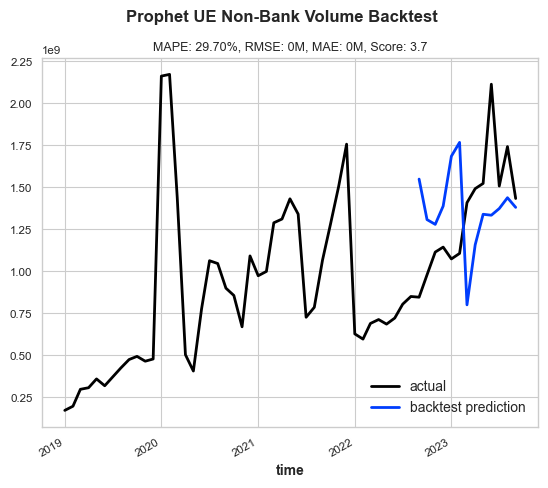

In [56]:
# Backtest Prophet model on ue_nonbank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_ue_nonbank_vol, 
              train=ue_nonbank_vol,
              suptitle='Prophet UE Non-Bank Volume Backtest',
              start_val=0.8)

In [57]:
# Save ue_nonbank_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_ue_nonbank_vol, pickle_name='ue_nonbank_vol_prophet')

ue_nonbank_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Nom Prophet

In [58]:
# Initialize Prophet model for training on ue_nonbank_nom
prophet_ue_nonbank_nom = Prophet(
                        add_seasonalities={
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

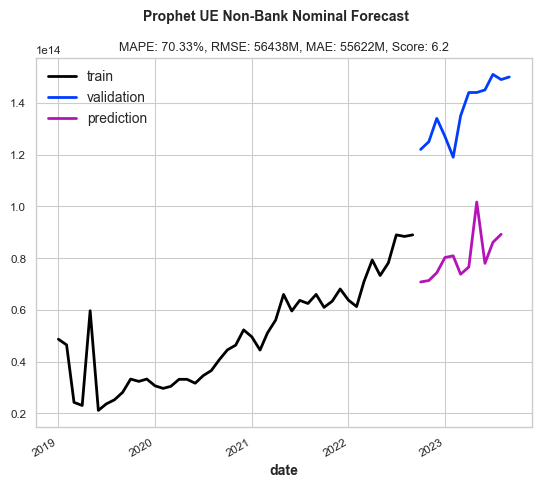

In [59]:
# Fit Prophet model on train_ue_nonbank_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_ue_nonbank_nom, 
            len=val_ue_nonbank_nom_len, 
            train=train_ue_nonbank_nom,
            val=val_ue_nonbank_nom,
            suptitle='Prophet UE Non-Bank Nominal Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

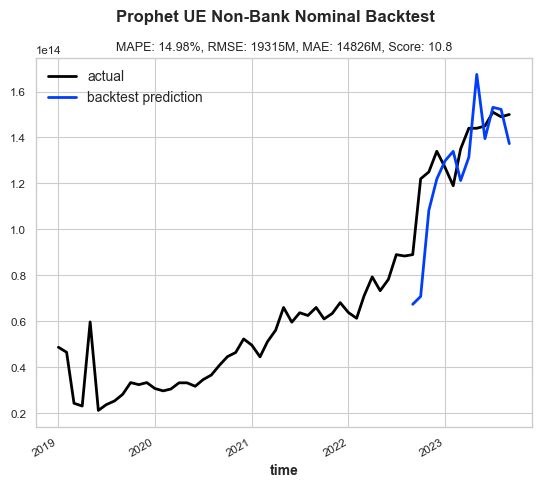

In [60]:
# Backtest Prophet model on ue_nonbank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_ue_nonbank_nom, 
              train=ue_nonbank_nom,
              suptitle='Prophet UE Non-Bank Nominal Backtest',
              start_val=0.8)

In [61]:
# Save ue_nonbank_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_ue_nonbank_nom, pickle_name='ue_nonbank_nom_prophet')

ue_nonbank_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Vol Prophet

In [62]:
# Initialize Prophet model for training on qris_vol
prophet_qris_vol = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

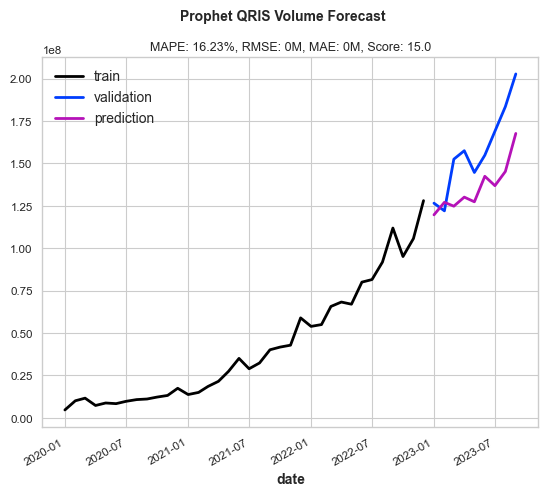

In [63]:
# Fit Prophet model on train_qris_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_qris_vol, 
            len=val_qris_vol_len, 
            train=train_qris_vol,
            val=val_qris_vol,
            suptitle='Prophet QRIS Volume Forecast')

  0%|          | 0/10 [00:00<?, ?it/s]

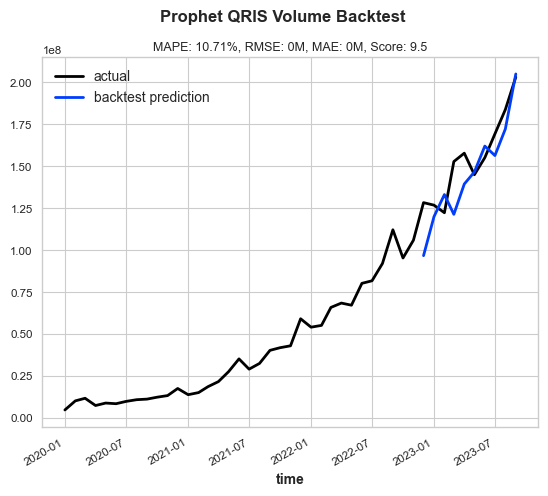

In [64]:
# Backtest Prophet model on qris_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_qris_vol, 
              train=qris_vol,
              suptitle='Prophet QRIS Volume Backtest',
              start_val=0.8)

In [65]:
# Save qris_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_qris_vol, pickle_name='qris_vol_prophet')

qris_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Nom Prophet

In [66]:
# Initialize Prophet model for training on qris_nom
prophet_qris_nom = Prophet(
                        add_seasonalities={         # Add monthly seasonality
                        'name':"monthly",           # Add monthly seasonality
                        'seasonal_periods':30,      # No. of days in one period
                        'fourier_order':1,          # No. of Fourier components to use
                        }, country_holidays='ID')   # Add Indonesian holidays

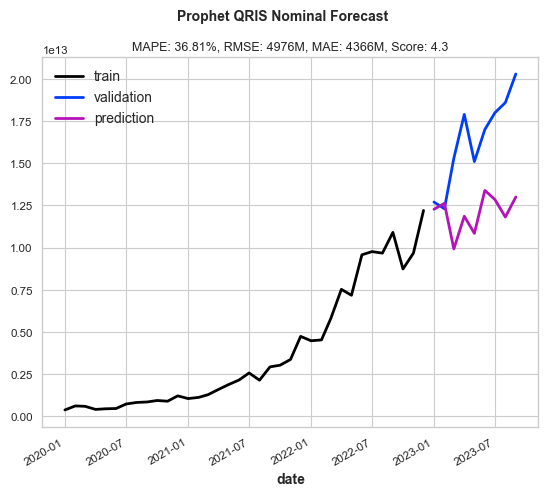

In [67]:
# Fit Prophet model on train_qris_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_qris_nom, 
            len=val_qris_nom_len, 
            train=train_qris_nom,
            val=val_qris_nom,
            suptitle='Prophet QRIS Nominal Forecast')

  0%|          | 0/10 [00:00<?, ?it/s]

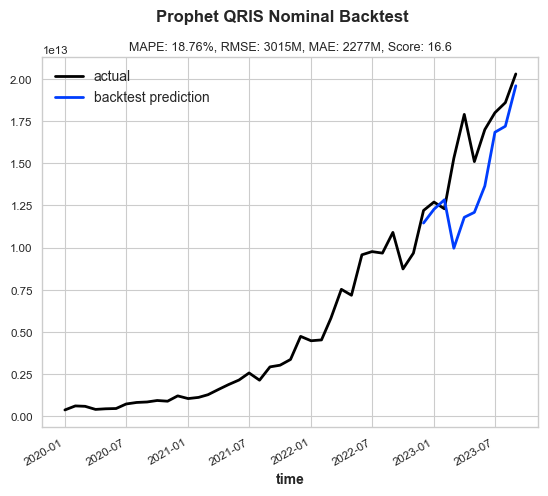

In [68]:
# Backtest Prophet model on qris_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_qris_nom, 
              train=qris_nom,
              suptitle='Prophet QRIS Nominal Backtest',
              start_val=0.8)

In [69]:
# Save qris_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_qris_nom, pickle_name='qris_nom_prophet')

qris_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### | Digital Banking Vol Prophet

In [70]:
# Initialize Prophet model for training on digital_banking_vol
prophet_digital_banking_vol = Prophet(
                                    add_seasonalities={         
                                    'name':"monthly",           # Add monthly seasonality
                                    'seasonal_periods':30,      # No. of days in one period
                                    'fourier_order':1,          # No. of Fourier components to use
                                    }, country_holidays='ID')   # Add Indonesian holidays

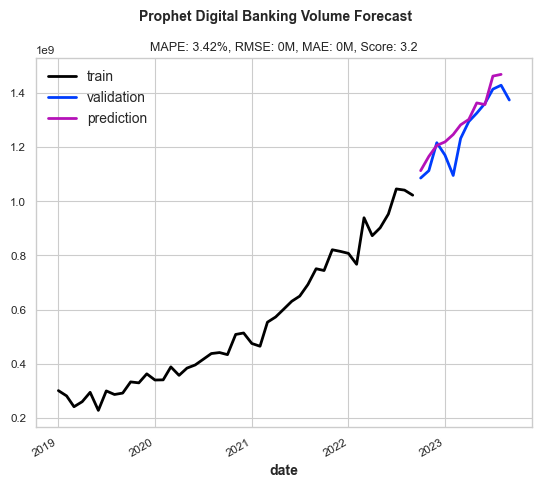

In [71]:
# Fit Prophet model on train_digital_banking_vol and plot the forecast using plot_pred function
plot_pred(model=prophet_digital_banking_vol, 
            len=val_digital_banking_vol_len, 
            train=train_digital_banking_vol,
            val=val_digital_banking_vol,
            suptitle='Prophet Digital Banking Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

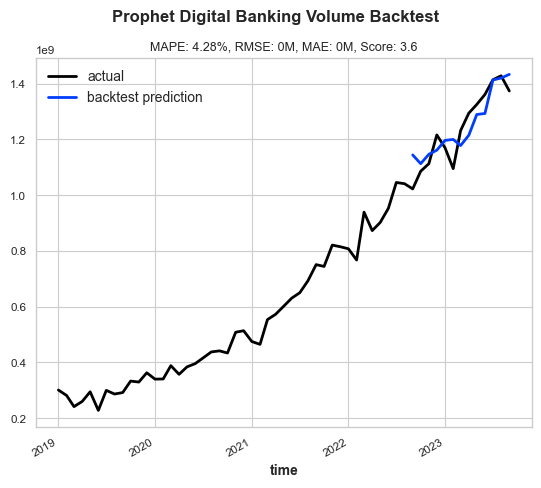

In [72]:
# Backtest Prophet model on digital_banking_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_digital_banking_vol, 
              train=digital_banking_vol,
              suptitle='Prophet Digital Banking Volume Backtest',
              start_val=0.8)

In [73]:
# Save digital_banking_vol Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_digital_banking_vol, pickle_name='digital_banking_vol_prophet')

digital_banking_vol_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### | Digital Banking Nom Prophet

In [74]:
# Initialize Prophet model for training on digital_banking_nom
prophet_digital_banking_nom = Prophet(
                                    add_seasonalities={         
                                    'name':"monthly",           # Add monthly seasonality
                                    'seasonal_periods':30,      # No. of days in one period
                                    'fourier_order':1,          # No. of Fourier components to use
                                    }, country_holidays='ID')   # Add Indonesian holidays

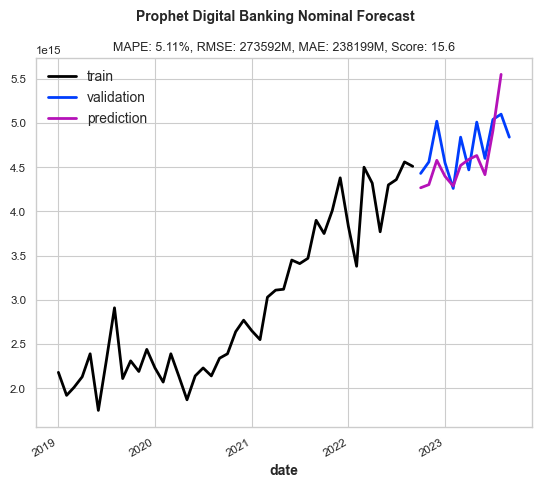

In [75]:
# Fit Prophet model on train_digital_banking_nom and plot the forecast using plot_pred function
plot_pred(model=prophet_digital_banking_nom, 
            len=val_digital_banking_nom_len, 
            train=train_digital_banking_nom,
            val=val_digital_banking_nom,
            suptitle='Prophet Digital Banking Nominal Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

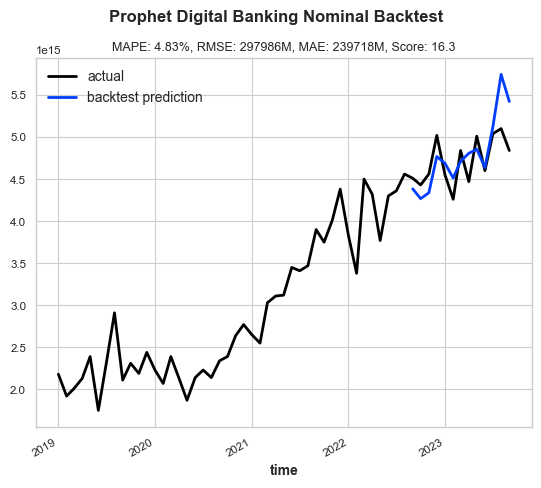

In [76]:
# Backtest Prophet model on digital_banking_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=prophet_digital_banking_nom, 
              train=digital_banking_nom,
              suptitle='Prophet Digital Banking Nominal Backtest',
              start_val=0.8)

In [77]:
# Save digital_banking_nom Prophet model into pickle file using model_pkl function
model_pkl(model=prophet_digital_banking_nom, pickle_name='digital_banking_nom_prophet')

digital_banking_nom_prophet saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


### Auto-ARIMA

#### Debit Vol Auto-ARIMA

In [78]:
# Initialize Auto-ARIMA model for training on debit_vol
autoarima_debit_vol = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

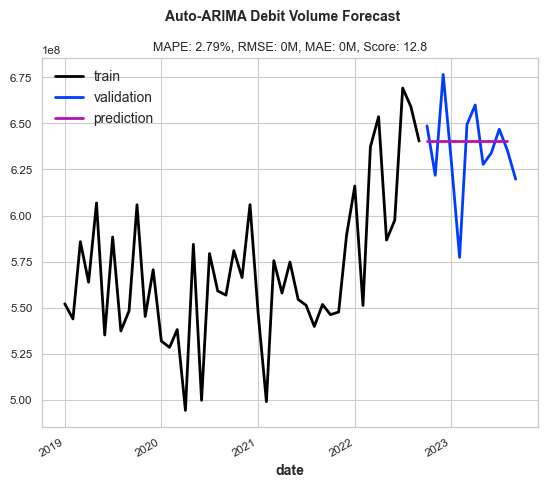

In [79]:
# Fit Auto-ARIMA model on train_debit_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_debit_vol, 
                len=val_debit_vol_len, 
                train=train_debit_vol,
                val=val_debit_vol,
                suptitle='Auto-ARIMA Debit Volume Forecast')

  0%|          | 0/13 [00:00<?, ?it/s]

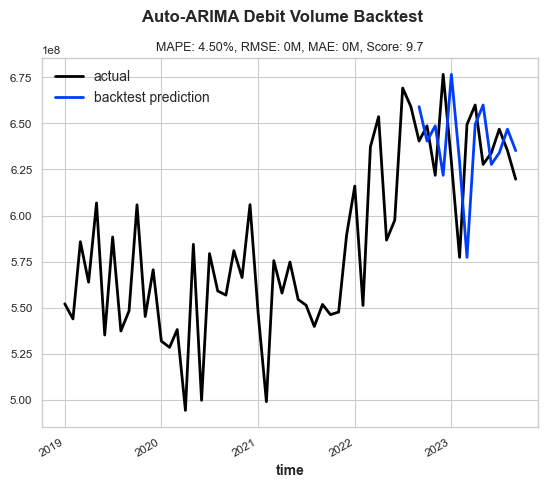

In [80]:
# Backtest Auto-ARIMA model on debit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_debit_vol, 
              train=debit_vol,
              suptitle='Auto-ARIMA Debit Volume Backtest',
              start_val=0.8)

In [81]:
# Save debit_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_debit_vol, pickle_name='debit_vol_autoarima')

debit_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Debit Nom Auto-ARIMA

In [82]:
# Initialize Auto-ARIMA model for training on debit_nom
autoarima_debit_nom = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

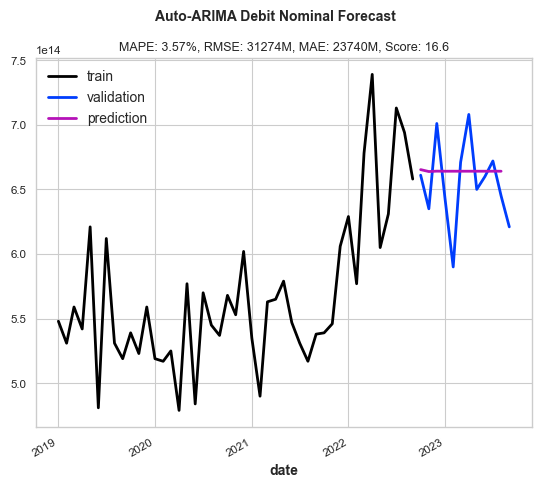

In [83]:
# Fit Auto-ARIMA model on train_debit_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_debit_nom, 
                len=val_debit_nom_len, 
                train=train_debit_nom,
                val=val_debit_nom,
                suptitle='Auto-ARIMA Debit Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

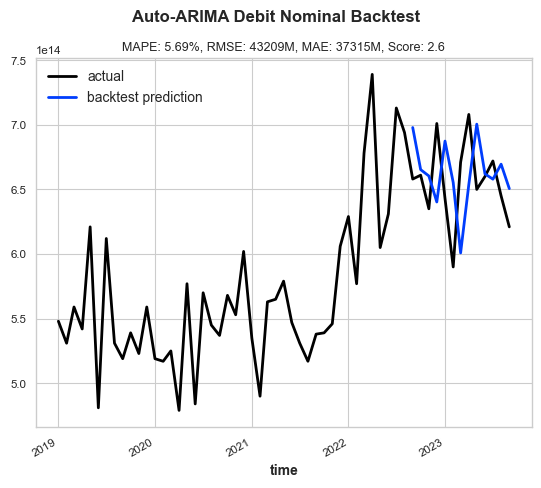

In [84]:
# Backtest Auto-ARIMA model on debit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_debit_nom, 
              train=debit_nom,
              suptitle='Auto-ARIMA Debit Nominal Backtest',
              start_val=0.8
)

In [85]:
# Save debit_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_debit_nom, pickle_name='debit_nom_autoarima')

debit_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Vol Auto-ARIMA

In [86]:
# Initialize Auto-ARIMA model for training on credit_vol
autoarima_credit_vol = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

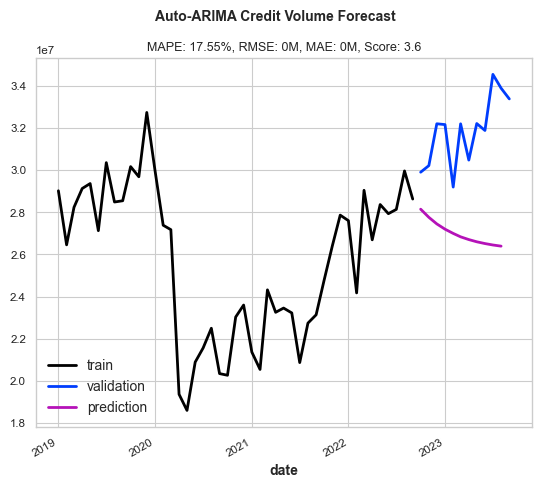

In [87]:
# Fit Auto-ARIMA model on train_credit_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_credit_vol, 
                len=val_credit_vol_len, 
                train=train_credit_vol,
                val=val_credit_vol,
                suptitle='Auto-ARIMA Credit Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

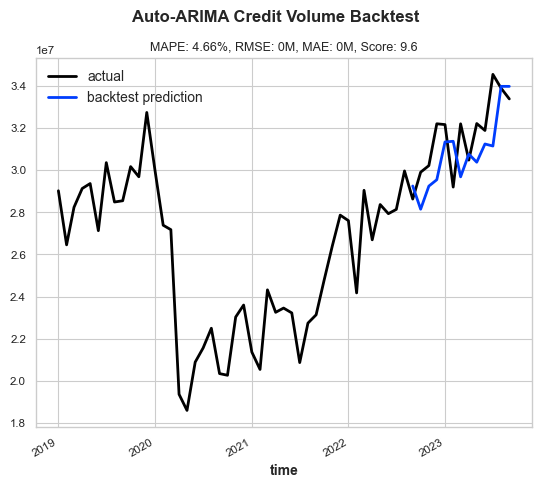

In [88]:
# Backtest Auto-ARIMA model on credit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_credit_vol, 
              train=credit_vol,
              suptitle='Auto-ARIMA Credit Volume Backtest',
              start_val=0.8
)

In [89]:
# Save credit_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_credit_vol, pickle_name='credit_vol_autoarima')

credit_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Nom Auto-ARIMA

In [90]:
# Initialize Auto-ARIMA model for training on credit_nom
autoarima_credit_nom = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

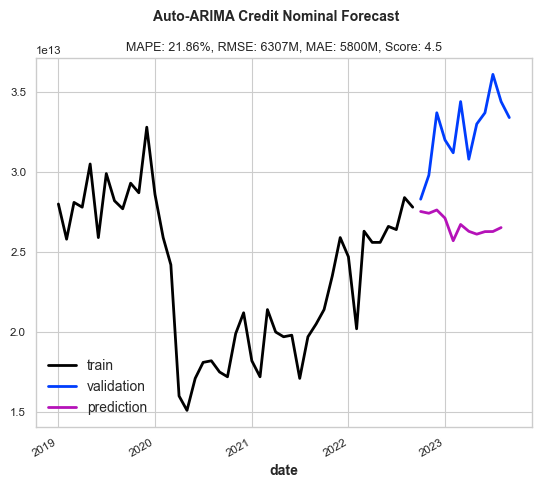

In [91]:
# Fit Auto-ARIMA model on train_credit_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_credit_nom, 
                len=val_credit_nom_len, 
                train=train_credit_nom,
                val=val_credit_nom,
                suptitle='Auto-ARIMA Credit Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

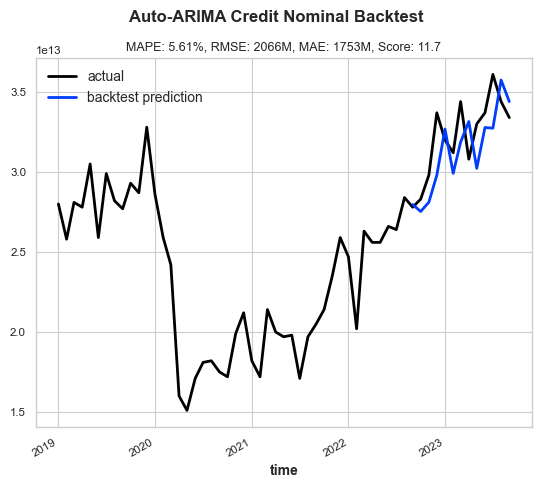

In [92]:
# Backtest Auto-ARIMA model on credit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_credit_nom, 
              train=credit_nom,
              suptitle='Auto-ARIMA Credit Nominal Backtest',
              start_val=0.8
)

In [93]:
# Save credit_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_credit_nom, pickle_name='credit_nom_autoarima')

credit_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Vol Auto-ARIMA

In [94]:
# Initialize Auto-ARIMA model for training on ue_bank_vol
autoarima_ue_bank_vol = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

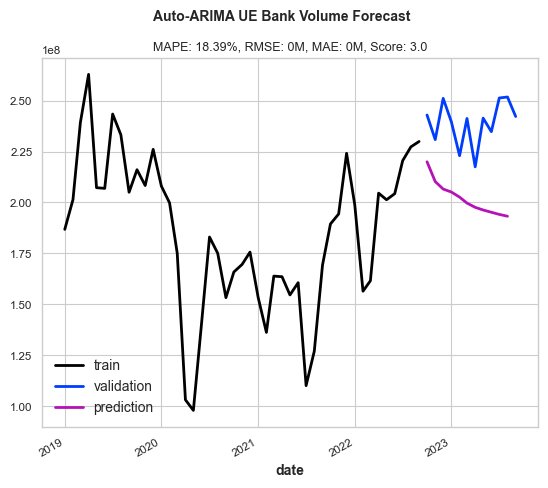

In [95]:
# Fit Auto-ARIMA model on train_ue_bank_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_ue_bank_vol, 
                len=val_ue_bank_vol_len, 
                train=train_ue_bank_vol,
                val=val_ue_bank_vol,
                suptitle='Auto-ARIMA UE Bank Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

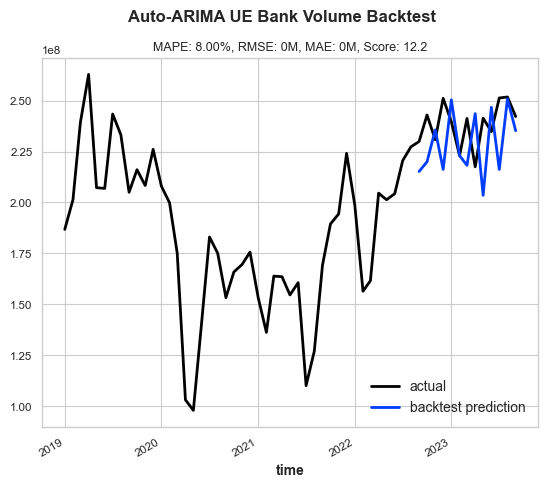

In [96]:
# Backtest Auto-ARIMA model on ue_bank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_ue_bank_vol, 
              train=ue_bank_vol,
              suptitle='Auto-ARIMA UE Bank Volume Backtest',
              start_val=0.8
)

In [97]:
# Save ue_bank_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_ue_bank_vol, pickle_name='ue_bank_vol_autoarima')

ue_bank_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Nom Auto-ARIMA

In [98]:
# Initialize Auto-ARIMA model for training on ue_bank_nom
autoarima_ue_bank_nom = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

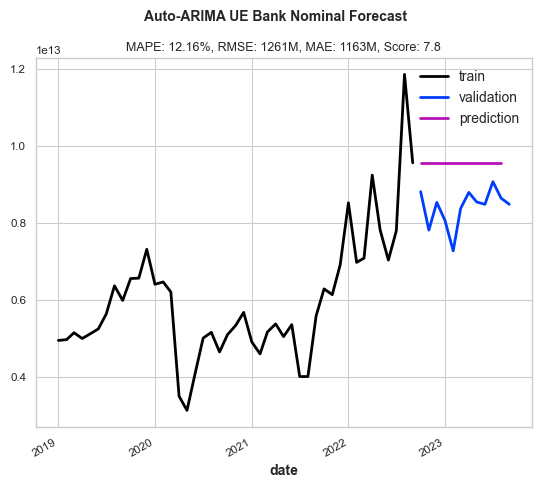

In [99]:
# Fit Auto-ARIMA model on train_ue_bank_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_ue_bank_nom, 
                len=val_ue_bank_nom_len, 
                train=train_ue_bank_nom,
                val=val_ue_bank_nom,
                suptitle='Auto-ARIMA UE Bank Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

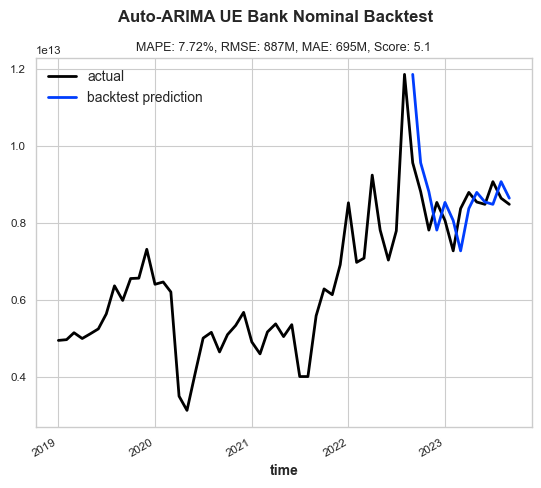

In [100]:
# Backtest Auto-ARIMA model on ue_bank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_ue_bank_nom, 
              train=ue_bank_nom,
              suptitle='Auto-ARIMA UE Bank Nominal Backtest',
              start_val=0.8
)

In [101]:
# Save ue_bank_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_ue_bank_nom, pickle_name='ue_bank_nom_autoarima')

ue_bank_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Vol Auto-ARIMA

In [102]:
# Initialize Auto-ARIMA model for training on ue_nonbank_vol
autoarima_ue_nonbank_vol = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

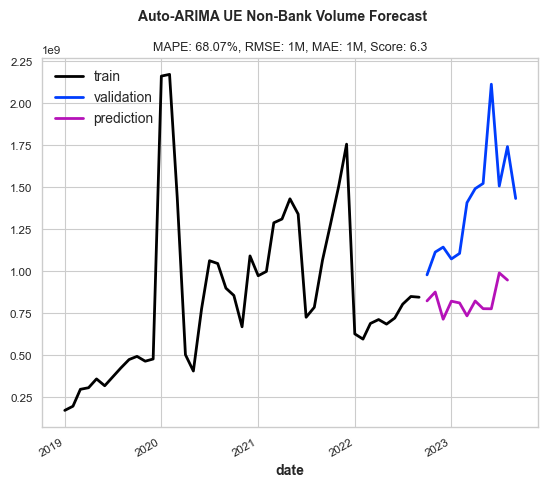

In [103]:
# Fit Auto-ARIMA model on train_ue_nonbank_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_ue_nonbank_vol, 
                len=val_ue_nonbank_vol_len, 
                train=train_ue_nonbank_vol,
                val=val_ue_nonbank_vol,
                suptitle='Auto-ARIMA UE Non-Bank Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

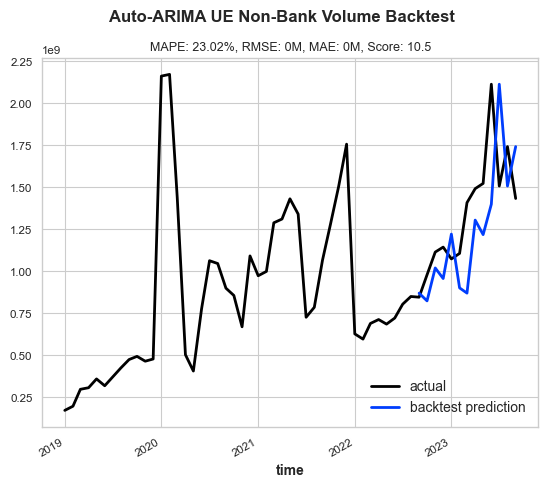

In [104]:
# Backtest Auto-ARIMA model on ue_nonbank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_ue_nonbank_vol, 
              train=ue_nonbank_vol,
              suptitle='Auto-ARIMA UE Non-Bank Volume Backtest',
              start_val=0.8
)

In [105]:
# Save ue_nonbank_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_ue_nonbank_vol, pickle_name='ue_nonbank_vol_autoarima')

ue_nonbank_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Nom Prophet

In [106]:
# Initialize Auto-ARIMA model for training on ue_nonbank_nom
autoarima_ue_nonbank_nom = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

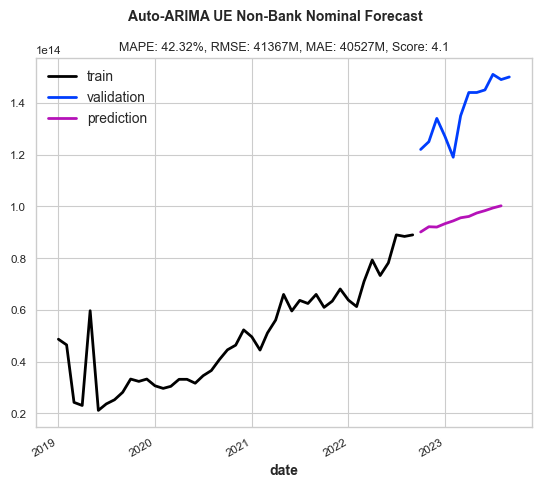

In [107]:
# Fit Auto-ARIMA model on train_ue_nonbank_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_ue_nonbank_nom, 
                len=val_ue_nonbank_nom_len, 
                train=train_ue_nonbank_nom,
                val=val_ue_nonbank_nom,
                suptitle='Auto-ARIMA UE Non-Bank Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

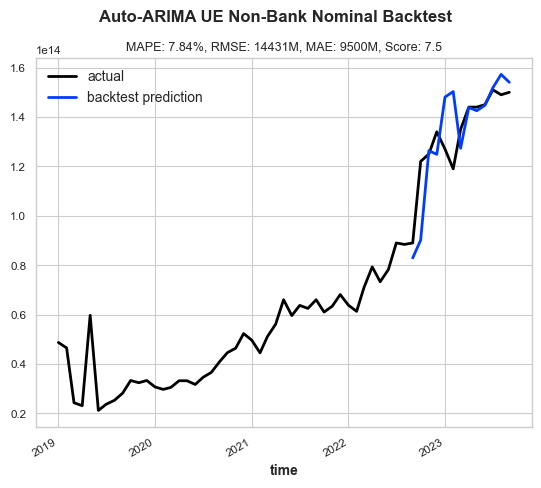

In [108]:
# Backtest Auto-ARIMA model on ue_nonbank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_ue_nonbank_nom, 
              train=ue_nonbank_nom,
              suptitle='Auto-ARIMA UE Non-Bank Nominal Backtest',
              start_val=0.8
)

In [109]:
# Save ue_nonbank_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_ue_nonbank_nom, pickle_name='ue_nonbank_nom_autoarima')

ue_nonbank_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Vol Auto-ARIMA

In [110]:
# Initialize Auto-ARIMA model for training on qris_vol
autoarima_qris_vol = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

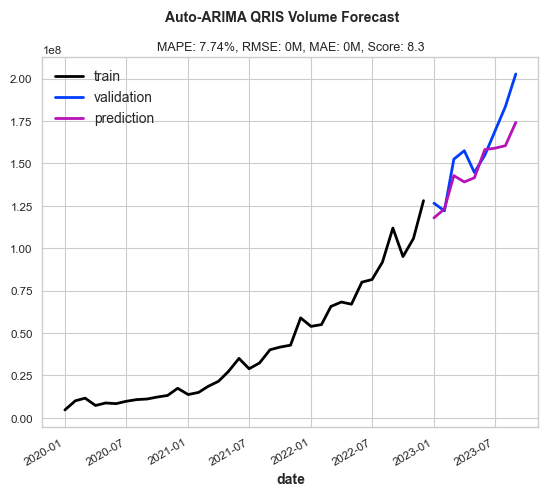

In [111]:
# Fit Auto-ARIMA model on train_qris_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_qris_vol, 
                len=val_qris_vol_len, 
                train=train_qris_vol,
                val=val_qris_vol,
                suptitle='Auto-ARIMA QRIS Volume Forecast'
)

  0%|          | 0/10 [00:00<?, ?it/s]

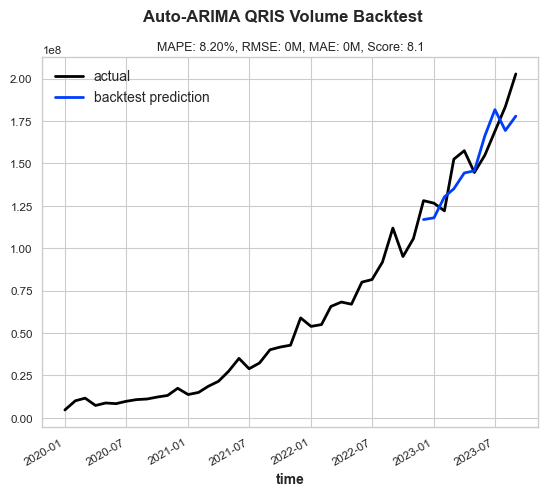

In [112]:
# Backtest Auto-ARIMA model on qris_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_qris_vol, 
              train=qris_vol,
              suptitle='Auto-ARIMA QRIS Volume Backtest'
)

In [113]:
# Save qris_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_qris_vol, pickle_name='qris_vol_autoarima')

qris_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Nom Auto-ARIMA

In [114]:
# Initialize Auto-ARIMA model for training on qris_nom
autoarima_qris_nom = AutoARIMA(
                            seasonal=True,          # Enable seasonal decomposition
                            m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                            suppress_warnings=True, # Suppress warnings during the optimization
                            scoring='mse',          # Use Mean Squared Error for model selection
                            random=True,            # Enable random search for hyperparameter tuning
                            stepwise=True,          # Use a stepwise approach to search for the best model
                            random_state=42         # Set a specific random seed for reproducibility
)

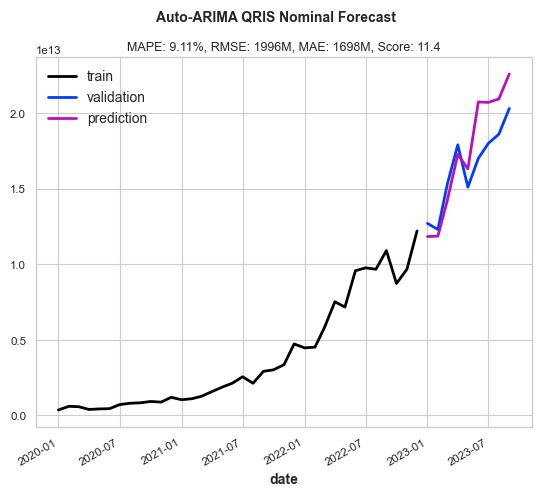

In [115]:
# Fit Auto-ARIMA model on train_qris_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_qris_nom, 
                len=val_qris_nom_len, 
                train=train_qris_nom,
                val=val_qris_nom,
                suptitle='Auto-ARIMA QRIS Nominal Forecast'
)

  0%|          | 0/10 [00:00<?, ?it/s]

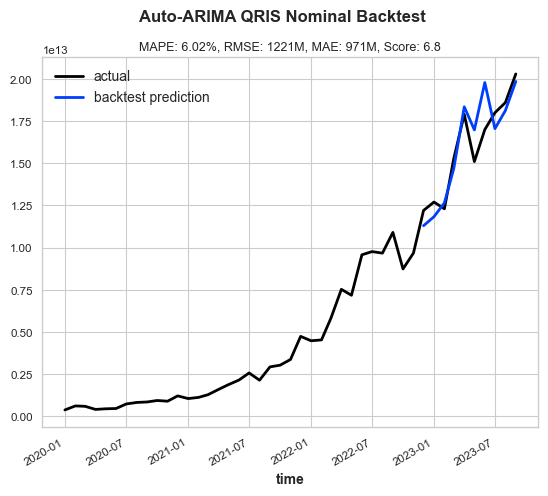

In [116]:
# Backtest Auto-ARIMA model on qris_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_qris_nom, 
              train=qris_nom,
              suptitle='Auto-ARIMA QRIS Nominal Backtest'
)

In [117]:
# Save qris_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_qris_nom, pickle_name='qris_nom_autoarima')

qris_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Digital Banking Vol Prophet

In [118]:
# Initialize Auto-ARIMA model for training on digital_banking_vol
autoarima_digital_banking_vol = AutoARIMA(
                                        seasonal=True,          # Enable seasonal decomposition
                                        m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                                        suppress_warnings=True, # Suppress warnings during the optimization
                                        scoring='mse',          # Use Mean Squared Error for model selection
                                        random=True,            # Enable random search for hyperparameter tuning
                                        stepwise=True,          # Use a stepwise approach to search for the best model
                                        random_state=42         # Set a specific random seed for reproducibility
)

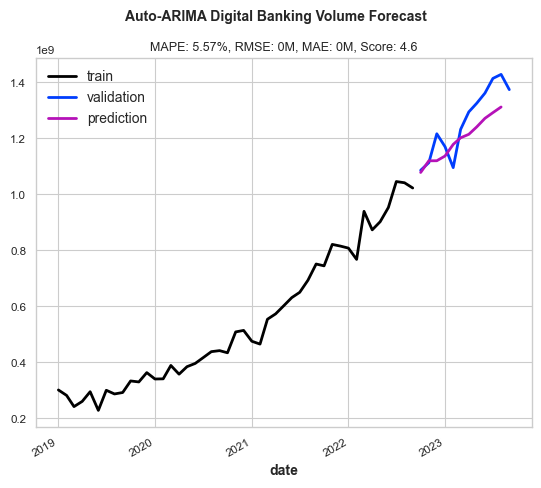

In [119]:
# Fit Auto-ARIMA model on train_digital_banking_vol and plot the forecast using plot_pred function
plot_pred(model=autoarima_digital_banking_vol, 
                len=val_digital_banking_vol_len, 
                train=train_digital_banking_vol,
                val=val_digital_banking_vol,
                suptitle='Auto-ARIMA Digital Banking Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

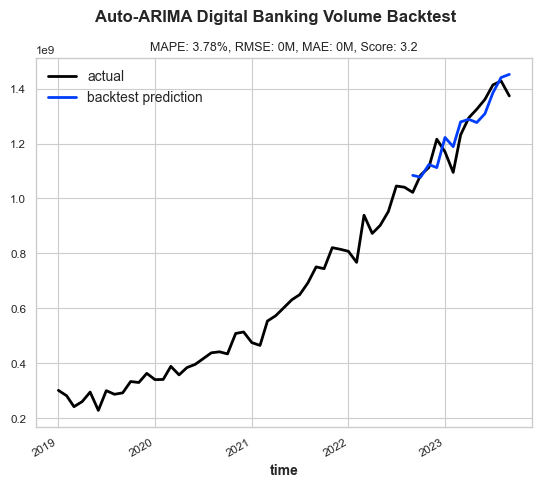

In [120]:
# Backtest Auto-ARIMA model on digital_banking_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_digital_banking_vol, 
              train=digital_banking_vol,
              suptitle='Auto-ARIMA Digital Banking Volume Backtest',
              start_val=0.8
)

In [121]:
# Save digital_banking_vol Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_digital_banking_vol, pickle_name='digital_banking_vol_autoarima')

digital_banking_vol_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Digital Banking Nom Prophet

In [122]:
# Initialize Auto-ARIMA model for training on digital_banking_nom
autoarima_digital_banking_nom = AutoARIMA(
                                        seasonal=True,          # Enable seasonal decomposition
                                        m=12,                   # Set the seasonality period (e.g., 12 for monthly data)
                                        suppress_warnings=True, # Suppress warnings during the optimization
                                        scoring='mse',          # Use Mean Squared Error for model selection
                                        random=True,            # Enable random search for hyperparameter tuning
                                        stepwise=True,          # Use a stepwise approach to search for the best model
                                        random_state=42         # Set a specific random seed for reproducibility
)

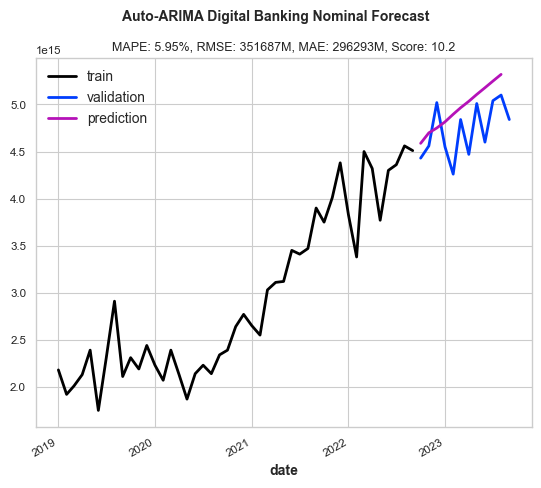

In [123]:
# Fit Auto-ARIMA model on train_digital_banking_nom and plot the forecast using plot_pred function
plot_pred(model=autoarima_digital_banking_nom, 
                len=val_digital_banking_nom_len, 
                train=train_digital_banking_nom,
                val=val_digital_banking_nom,
                suptitle='Auto-ARIMA Digital Banking Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

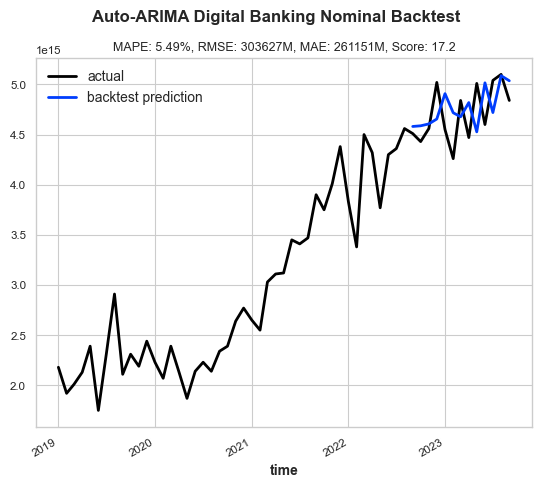

In [124]:
# Backtest Auto-ARIMA model on digital_banking_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=autoarima_digital_banking_nom, 
              train=digital_banking_nom,
              suptitle='Auto-ARIMA Digital Banking Nominal Backtest',
              start_val=0.8
)

In [125]:
# Save digital_banking_nom Auto-ARIMA model into pickle file using model_pkl function
model_pkl(model=autoarima_digital_banking_nom, pickle_name='digital_banking_nom_autoarima')

digital_banking_nom_autoarima saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


### Exponential Smoothing

#### Debit Vol Exponential Smoothing

In [126]:
# Initialize Exponential Smoothing model for training on debit_vol
exp_smoothing_debit_vol = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

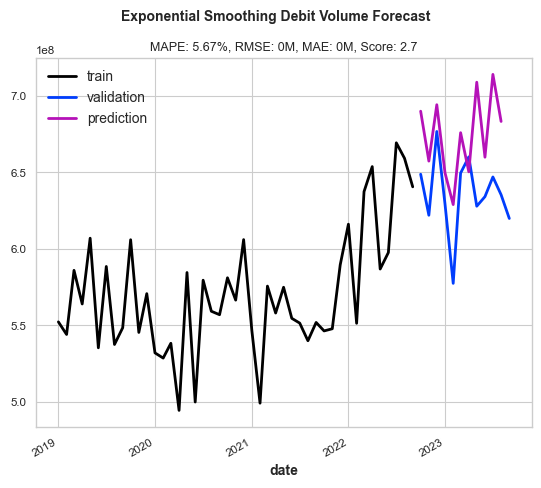

In [127]:
# Fit Exponential Smoothing model on train_debit_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_debit_vol, 
                len=val_debit_vol_len, 
                train=train_debit_vol,
                val=val_debit_vol,
                suptitle='Exponential Smoothing Debit Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

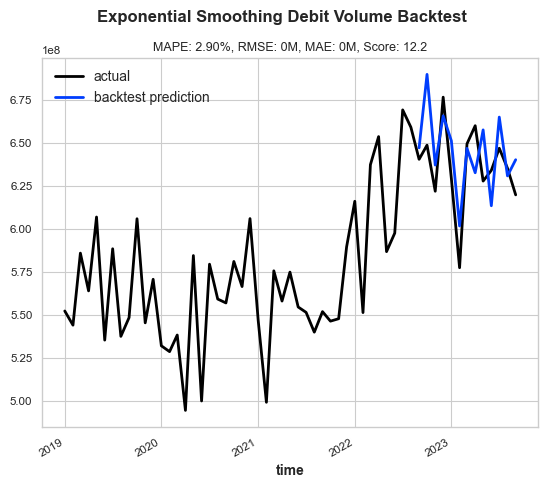

In [128]:
# Backtest Exponential Smoothing model on debit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_debit_vol, 
              train=debit_vol,
              suptitle='Exponential Smoothing Debit Volume Backtest',
              start_val=0.8
)

In [129]:
# Save debit_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_debit_vol, pickle_name='debit_vol_exp_smoothing')

debit_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Debit Nom Exponential Smoothing

In [130]:
# Initialize Exponential Smoothing model for training on debit_nom
exp_smoothing_debit_nom = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

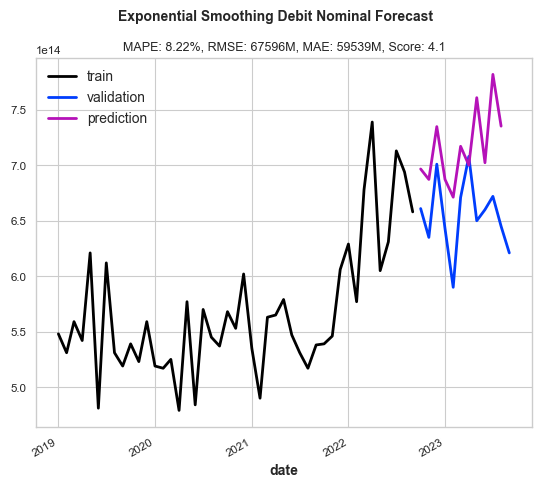

In [131]:
# Fit Exponential Smoothing model on train_debit_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_debit_nom, 
                len=val_debit_nom_len, 
                train=train_debit_nom,
                val=val_debit_nom,
                suptitle='Exponential Smoothing Debit Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

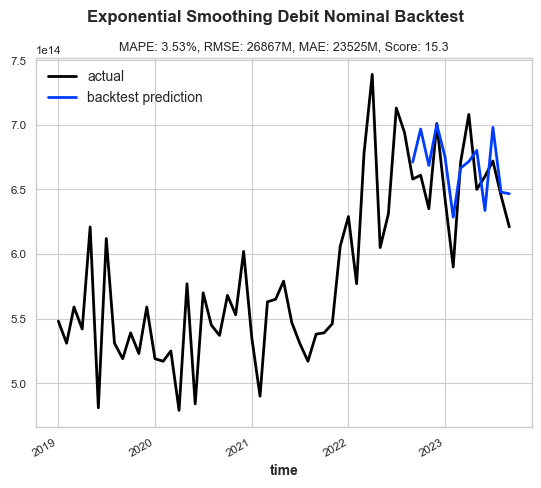

In [132]:
# Backtest Exponential Smoothing model on debit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_debit_nom, 
              train=debit_nom,
              suptitle='Exponential Smoothing Debit Nominal Backtest',
              start_val=0.8
)

In [133]:
# Save debit_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_debit_nom, pickle_name='debit_nom_exp_smoothing')

debit_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Vol Exponential Smoothing

In [134]:
# Initialize Exponential Smoothing model for training on credit_vol
exp_smoothing_credit_vol = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

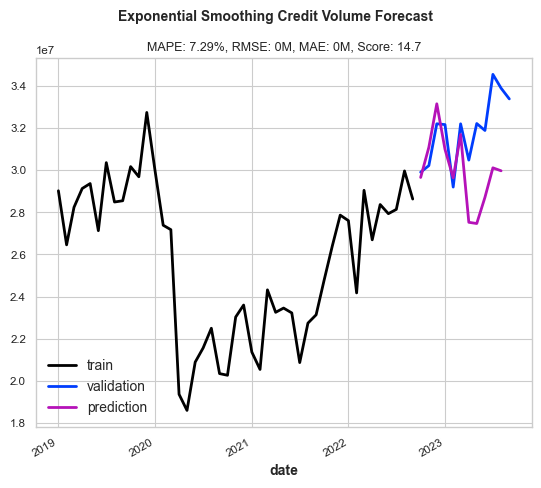

In [135]:
# Fit Exponential Smoothing model on train_credit_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_credit_vol, 
                len=val_credit_vol_len, 
                train=train_credit_vol,
                val=val_credit_vol,
                suptitle='Exponential Smoothing Credit Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

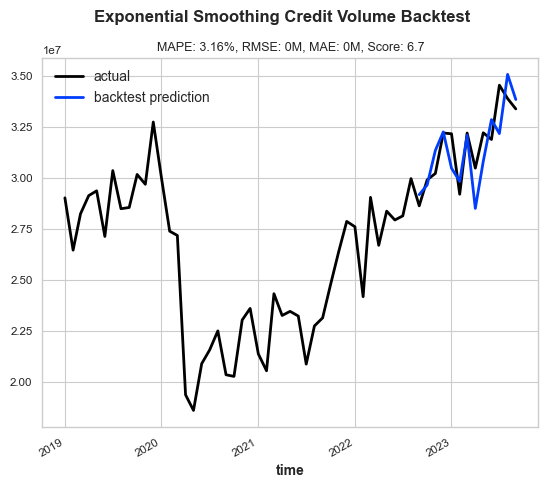

In [136]:
# Backtest Exponential Smoothing model on credit_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_credit_vol, 
              train=credit_vol,
              suptitle='Exponential Smoothing Credit Volume Backtest',
              start_val=0.8
)

In [137]:
# Save credit_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_credit_vol, pickle_name='credit_vol_exp_smoothing')

credit_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Credit Nom Exponential Smoothing

In [138]:
# Initialize Exponential Smoothing model for training on credit_nom
exp_smoothing_credit_nom = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

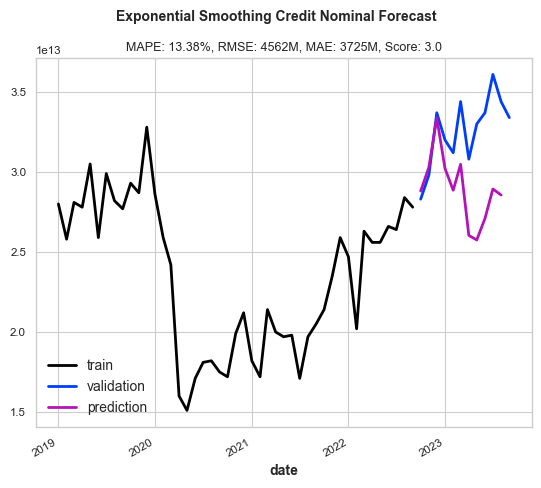

In [139]:
# Fit Exponential Smoothing model on train_credit_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_credit_nom, 
                len=val_credit_nom_len, 
                train=train_credit_nom,
                val=val_credit_nom,
                suptitle='Exponential Smoothing Credit Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

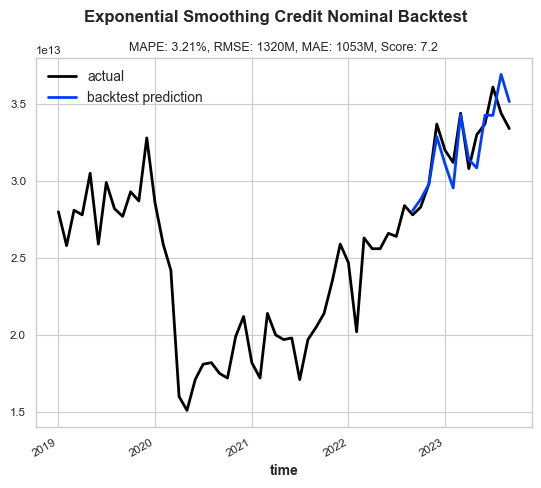

In [140]:
# Backtest Exponential Smoothing model on credit_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_credit_nom, 
              train=credit_nom,
              suptitle='Exponential Smoothing Credit Nominal Backtest',
              start_val=0.8
)

In [141]:
# Save credit_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_credit_nom, pickle_name='credit_nom_exp_smoothing')

credit_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Vol Exponential Smoothing

In [142]:
# Initialize Exponential Smoothing model for training on ue_bank_vol
exp_smoothing_ue_bank_vol = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

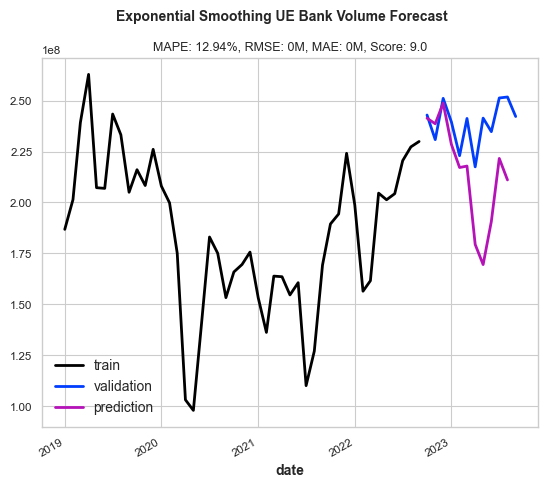

In [143]:
# Fit Exponential Smoothing model on train_ue_bank_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_ue_bank_vol, 
                len=val_ue_bank_vol_len, 
                train=train_ue_bank_vol,
                val=val_ue_bank_vol,
                suptitle='Exponential Smoothing UE Bank Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

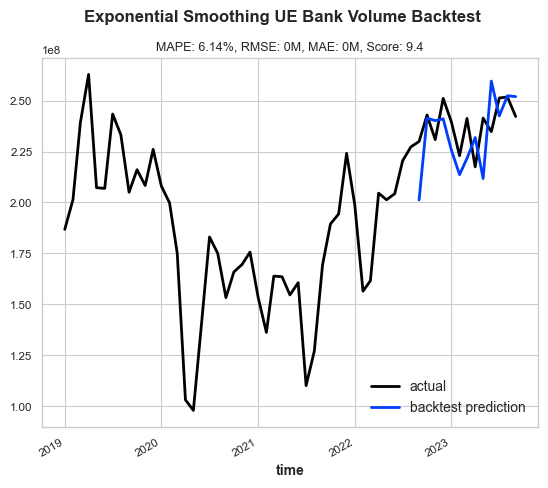

In [144]:
# Backtest Exponential Smoothing model on ue_bank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_ue_bank_vol, 
              train=ue_bank_vol,
              suptitle='Exponential Smoothing UE Bank Volume Backtest',
              start_val=0.8
)

In [145]:
# Save ue_bank_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_ue_bank_vol, pickle_name='ue_bank_vol_exp_smoothing')

ue_bank_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Bank Nom Exponential Smoothing

In [146]:
# Initialize Exponential Smoothing model for training on ue_bank_nom
exp_smoothing_ue_bank_nom = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

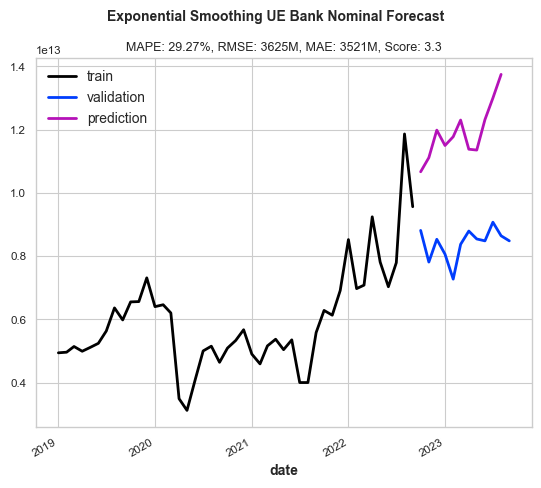

In [147]:
# Fit Exponential Smoothing model on train_ue_bank_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_ue_bank_nom, 
                len=val_ue_bank_nom_len, 
                train=train_ue_bank_nom,
                val=val_ue_bank_nom,
                suptitle='Exponential Smoothing UE Bank Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

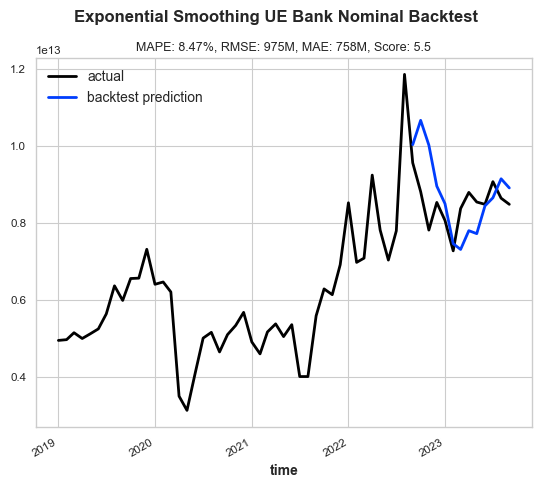

In [148]:
# Backtest Exponential Smoothing model on ue_bank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_ue_bank_nom, 
              train=ue_bank_nom,
              suptitle='Exponential Smoothing UE Bank Nominal Backtest',
              start_val=0.8
)

In [149]:
# Save ue_bank_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_ue_bank_nom, pickle_name='ue_bank_nom_exp_smoothing')

ue_bank_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Vol Exponential Smoothing

In [150]:
# Initialize Exponential Smoothing model for training on ue_nonbank_vol
exp_smoothing_ue_nonbank_vol = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

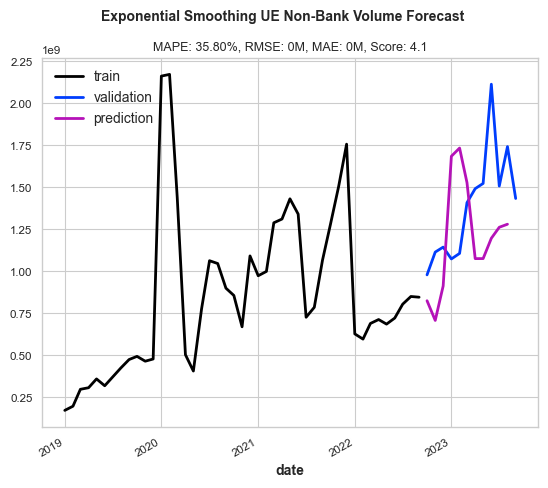

In [151]:
# Fit Exponential Smoothing model on train_ue_nonbank_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_ue_nonbank_vol, 
                len=val_ue_nonbank_vol_len, 
                train=train_ue_nonbank_vol,
                val=val_ue_nonbank_vol,
                suptitle='Exponential Smoothing UE Non-Bank Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

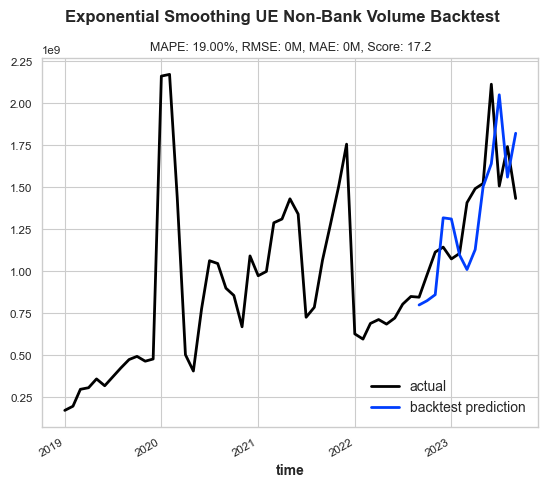

In [152]:
#  Backtest Exponential Smoothing model on ue_nonbank_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_ue_nonbank_vol, 
              train=ue_nonbank_vol,
              suptitle='Exponential Smoothing UE Non-Bank Volume Backtest',
              start_val=0.8
)

In [153]:
# Save ue_nonbank_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_ue_nonbank_vol, pickle_name='ue_nonbank_vol_exp_smoothing')

ue_nonbank_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### UE Non-Bank Nom Exponential Smoothing

In [154]:
# Initialize Exponential Smoothing model for training on ue_nonbank_nom
exp_smoothing_ue_nonbank_nom = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

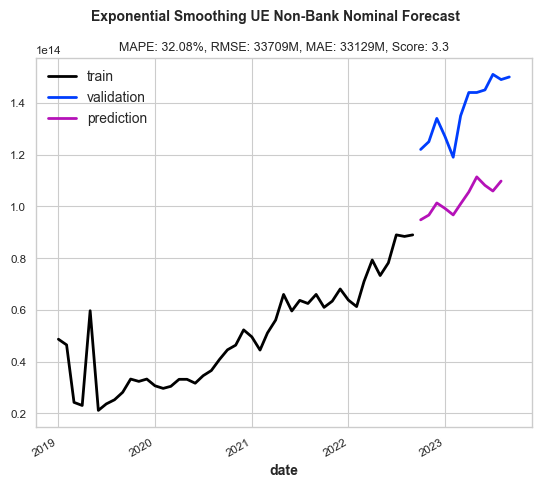

In [155]:
# Fit Exponential Smoothing model on train_ue_nonbank_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_ue_nonbank_nom, 
                len=val_ue_nonbank_nom_len, 
                train=train_ue_nonbank_nom,
                val=val_ue_nonbank_nom,
                suptitle='Exponential Smoothing UE Non-Bank Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

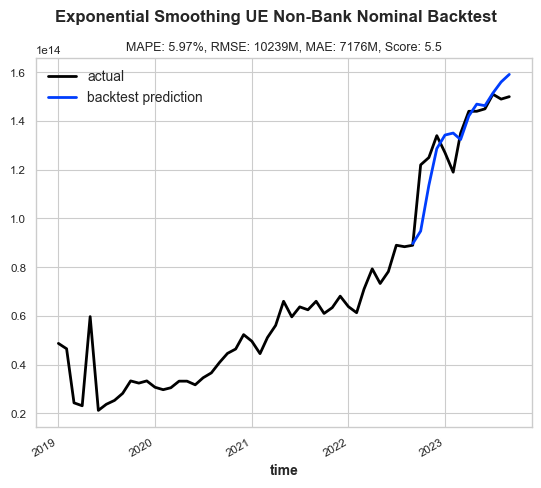

In [156]:
# Backtest Exponential Smoothing model on ue_nonbank_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_ue_nonbank_nom, 
              train=ue_nonbank_nom,
              suptitle='Exponential Smoothing UE Non-Bank Nominal Backtest',
              start_val=0.8
)

In [157]:
# Save ue_nonbank_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_ue_nonbank_nom, pickle_name='ue_nonbank_nom_exp_smoothing')

ue_nonbank_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Vol Exponential Smoothing

In [158]:
# Initialize Prophet model for training on qris_vol
exp_smoothing_qris_vol = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

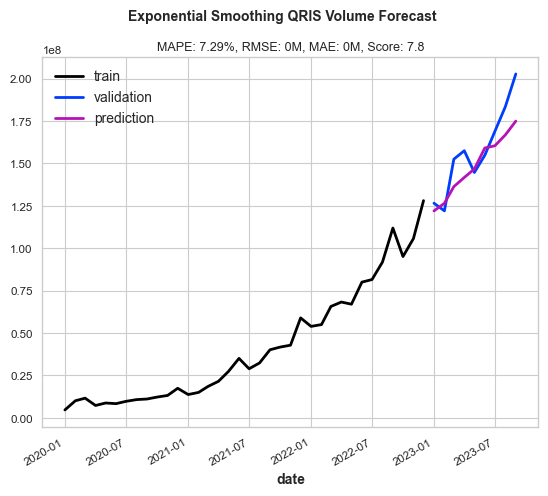

In [159]:
# Fit Exponential Smoothing model on train_qris_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_qris_vol, 
                len=val_qris_vol_len, 
                train=train_qris_vol,
                val=val_qris_vol,
                suptitle='Exponential Smoothing QRIS Volume Forecast'
)

  0%|          | 0/10 [00:00<?, ?it/s]

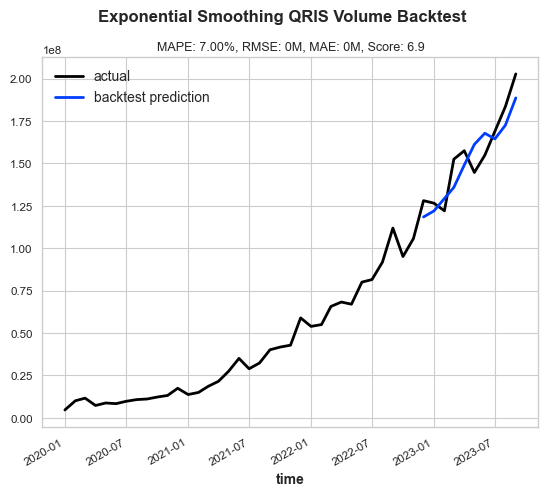

In [160]:
# Backtest Exponential Smoothing model on qris_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_qris_vol, 
              train=qris_vol,
              suptitle='Exponential Smoothing QRIS Volume Backtest'
)

In [161]:
# Save qris_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_qris_vol, pickle_name='qris_vol_exp_smoothing')

qris_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### QRIS Nom Exponential Smoothing

In [162]:
# Initialize Exponential Smoothing model for training on qris_nom
exp_smoothing_qris_nom = ExponentialSmoothing(
                                            trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            damped=True,                        # Should the trend component be damped: True or False
                                            seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                            seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

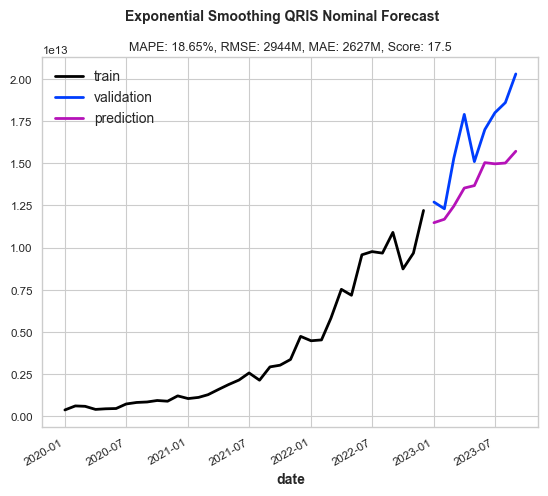

In [163]:
# Fit Exponential Smoothing model on train_qris_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_qris_nom, 
                len=val_qris_nom_len, 
                train=train_qris_nom,
                val=val_qris_nom,
                suptitle='Exponential Smoothing QRIS Nominal Forecast'
)

  0%|          | 0/10 [00:00<?, ?it/s]

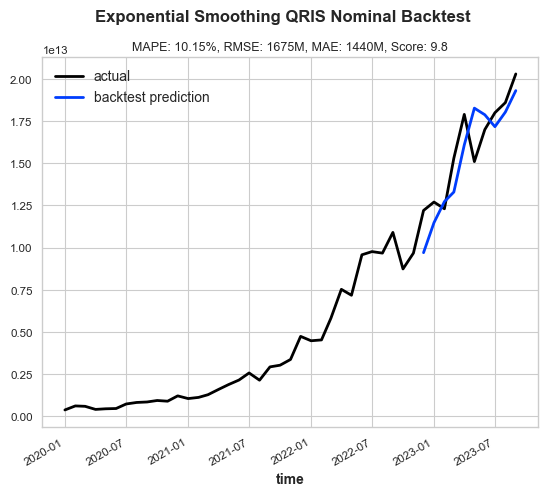

In [164]:
# Backtest Exponential Smoothing model on qris_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_qris_nom, 
              train=qris_nom,
              suptitle='Exponential Smoothing QRIS Nominal Backtest'
)

In [165]:
# Save qris_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_qris_nom, pickle_name='qris_nom_exp_smoothing')

qris_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Digital Banking Vol Exponential Smoothing

In [166]:
# Initialize Exponential Smoothing model for training on digital_banking_vol
exp_smoothing_digital_banking_vol = ExponentialSmoothing(
                                                        trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                                        damped=True,                        # Should the trend component be damped: True or False
                                                        seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                                        seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

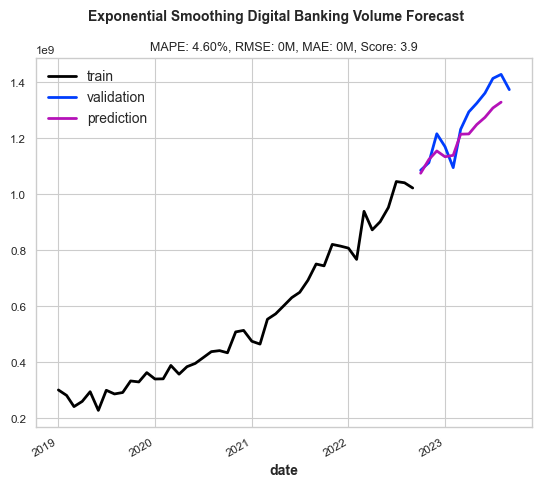

In [167]:
# Fit Exponential Smoothing model on train_digital_banking_vol and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_digital_banking_vol, 
                len=val_digital_banking_vol_len, 
                train=train_digital_banking_vol,
                val=val_digital_banking_vol,
                suptitle='Exponential Smoothing Digital Banking Volume Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

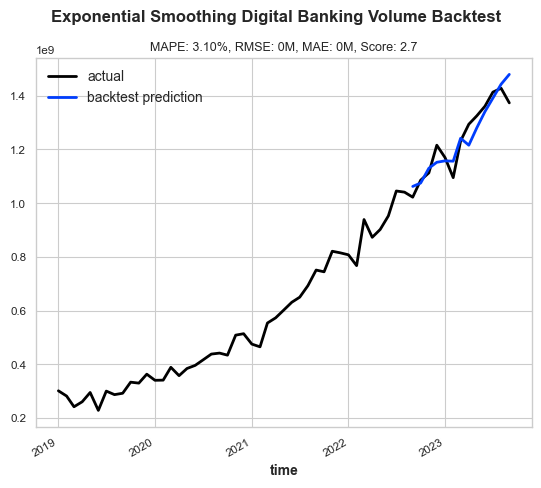

In [168]:
# Backtest Exponential Smoothing model on digital_banking_vol full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_digital_banking_vol, 
              train=digital_banking_vol,
              suptitle='Exponential Smoothing Digital Banking Volume Backtest',
              start_val=0.8
)

In [169]:
# Save digital_banking_vol Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_digital_banking_vol, pickle_name='digital_banking_vol_exp_smoothing')

digital_banking_vol_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


#### Digital Banking Nom Exponential Smoothing

In [170]:
# Initialize Exponential Smoothing model for training on digital_banking_nom
exp_smoothing_digital_banking_nom = ExponentialSmoothing(
                                                        trend=ModelMode.ADDITIVE,           # Type of trend component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                                        damped=True,                        # Should the trend component be damped: True or False
                                                        seasonal=SeasonalityMode.ADDITIVE,  # Type of seasonal component: ADDITIVE, MULTIPLICATIVE, NONE, or None
                                                        seasonal_periods=12,                # Number of periods in a complete seasonal cycle
)

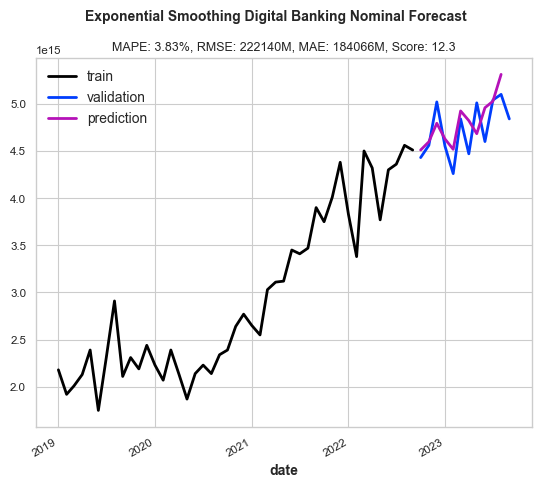

In [171]:
# Fit Exponential Smoothing model on train_digital_banking_nom and plot the forecast using plot_pred function
plot_pred(model=exp_smoothing_digital_banking_nom, 
                len=val_digital_banking_nom_len, 
                train=train_digital_banking_nom,
                val=val_digital_banking_nom,
                suptitle='Exponential Smoothing Digital Banking Nominal Forecast'
)

  0%|          | 0/13 [00:00<?, ?it/s]

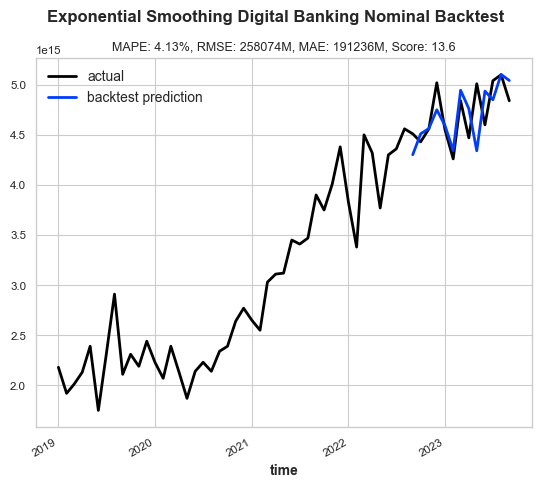

In [172]:
# Backtest Exponential Smoothing model on digital_banking_nom full data and plot backtest result using plot_backtest function
plot_backtest(model=exp_smoothing_digital_banking_nom, 
              train=digital_banking_nom,
              suptitle='Exponential Smoothing Digital Banking Nominal Backtest',
              start_val=0.8
)

In [173]:
# Save digital_banking_nom Exponential Smoothing model into pickle file using model_pkl function
model_pkl(model=exp_smoothing_digital_banking_nom, pickle_name='digital_banking_nom_exp_smoothing')

digital_banking_nom_exp_smoothing saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\
